<a href="https://colab.research.google.com/github/shlee0619/workStats/blob/main/1223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류분석(계속)

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 준비 - 유방암데이터

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hwda02/data/breast-cancer-wisconsin.data', header = None)
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']
df['bare_nuclei'].replace("?", np.nan, inplace = True)
df.dropna(subset = 'bare_nuclei', axis = 0, inplace = True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')
df.head()

<ipython-input-299-ad15fec9ffec>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bare_nuclei'].replace("?", np.nan, inplace = True)


,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# 데이터 분할
# 전체 데이터
X = df.drop(['id', 'class'], axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (683, 9)
y 데이터:  (683,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (478, 9)
test 데이터:  (205, 9)


# 앙상블

## 랜덤포레스트 - 유방암데이터

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.3158, 0.3133, 0.3012, 0.3011, 0.3067, 0.3074, 0.3321, 0.3193,
       0.3083, 0.2951]), 'score_time': array([0.0629, 0.0439, 0.039 , 0.0385, 0.0393, 0.0386, 0.0385, 0.0421,
       0.0384, 0.037 ]), 'test_score': array([0.9583, 0.9792, 0.9167, 0.9583, 0.9583, 0.9375, 1.    , 0.9792,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9602393617021278


### 변수 중요도

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rf.feature_importances_

array([0.0457, 0.3368, 0.2346, 0.0423, 0.0349, 0.1535, 0.0711, 0.0729,
       0.0083])

In [ ]:
f_imp_v = rf.feature_importances_

In [ ]:
f_imp_v = pd.Series(f_imp_v, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

,0
cell_size,0.336821
cell_shape,0.234638
bare_nuclei,0.153507
normal_nucleoli,0.072855
chromatin,0.071070
clump,0.045657
adhesion,0.042269
epithlial,0.034877
mitoses,0.008307


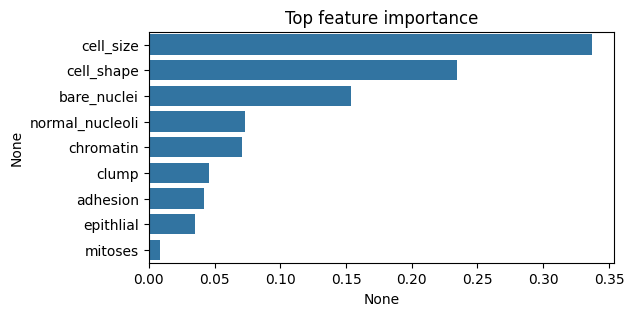

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

1.0
0.9512195121951219


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[317   0]
 [  0 161]]
[[125   2]
 [  8  70]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       317
           4       1.00      1.00      1.00       161

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

              precision    recall  f1-score   support

           2       0.94      0.98      0.96       127
           4       0.97      0.90      0.93        78

    accuracy                           0.95       205
   macro avg       0.96      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



### OOB

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score=True, n_jobs = -1, random_state=42)
rf.fit(X_train, y_train)
print(rf.oob_score_)

0.9644351464435147


### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1, random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19f00b4c0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a1a00e1c30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a1a227ea10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a1a1272050>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

RandomForestClassifier(max_depth=11, min_impurity_decrease=0.000914845479529625,
                       min_samples_split=10, n_jobs=-1, random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.9769874476987448
0.9609756097560975


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 11,
 'min_impurity_decrease': 0.000914845479529625,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8,
  'min_impurity_decrease': 0.0009761972855462562,
  'min_samples_leaf': 15,
  'min_samples_split': 44},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0007585243326167404,
  'min_samples_leaf': 7,
  'min_samples_split': 20},
 {'max_depth': 8,
  'min_impurity_decrease': 0.00016389197338501942,
  'min_samples_leaf': 24,
  'min_samples_split': 37},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0008788798355756502,
  'min_samples_leaf': 22,
  'min_samples_split': 3},
 {'max_depth': 9,
  'min_impurity_decrease': 0.001015686904880464,
  'min_samples_leaf': 6,
  'min_samples_split': 3},
 {'max_depth': 6,
  'min_impurity_decrease': 0.0007792296605904882,
  'min_samples_leaf': 22,
  'min_samples_split': 45},
 {'max_depth': 10,
  'min_impurity_decrease': 0.0004203520542178461,
  'min_samples_leaf': 10,
  'min_samples_split': 29},
 {'max_depth': 4,
  'min_impurity_decrease': 0.0005207081903938791,
  'min_samples_leaf': 20,
  'min_samples_split': 4},
 {'max_depth': 6,
  'min_imp

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.9749122807017544

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.9769874476987448
0.9609756097560975


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[309   8]
 [  3 158]]
[[125   2]
 [  6  72]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98       317
           4       0.95      0.98      0.97       161

    accuracy                           0.98       478
   macro avg       0.97      0.98      0.97       478
weighted avg       0.98      0.98      0.98       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       127
           4       0.97      0.92      0.95        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.96       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
print(y_test)
y_test_new = label_encoder.fit_transform(y_test)
print(y_test_new)

304    4
149    4
217    2
120    2
314    2
      ..
268    4
360    4
238    4
634    2
572    2
Name: class, Length: 205, dtype: int64
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0]


In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test_new, y_test_proba1)

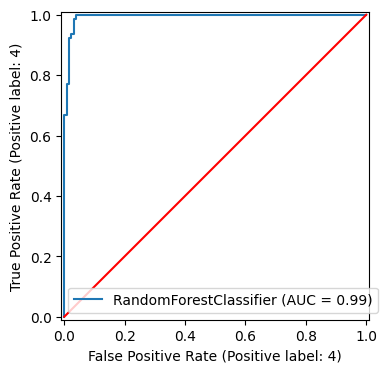

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.9943468604885928
0.9943468604885928


## 엑스트라트리 - 유방암데이터

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
# DecisionTreeClassifier(splitter = 'random') 사용
et = ExtraTreesClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.2525, 0.2491, 0.2482, 0.2461, 0.2533, 0.2666, 0.2418, 0.2499,
       0.2289, 0.244 ]), 'score_time': array([0.0423, 0.0427, 0.0388, 0.0441, 0.0394, 0.0492, 0.0453, 0.0383,
       0.0424, 0.0405]), 'test_score': array([0.9583, 0.9792, 0.9583, 0.9583, 0.9583, 0.9583, 0.9792, 0.9792,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9644060283687944


### 모델 훈련 & 교차검증 - 나무 개수 증가

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators = 200, n_jobs = -1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.85  , 0.8619, 0.881 , 0.6832, 0.9514, 0.946 , 0.9803, 0.8384,
       0.9763, 0.9477]), 'score_time': array([0.0667, 0.1215, 0.084 , 0.0963, 0.1071, 0.1087, 0.1163, 0.1025,
       0.0795, 0.0999]), 'test_score': array([0.9583, 0.9792, 0.9375, 0.9583, 0.9583, 0.9375, 0.9792, 0.9792,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9602393617021278


### 변수 중요도

In [ ]:
et.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
et.feature_importances_

array([0.0681, 0.1952, 0.1616, 0.0503, 0.0656, 0.2767, 0.081 , 0.0873,
       0.0141])

In [ ]:
f_imp_v = et.feature_importances_

In [ ]:
f_imp_v = pd.Series(f_imp_v, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

,0
bare_nuclei,0.276707
cell_size,0.195227
cell_shape,0.161643
normal_nucleoli,0.087288
chromatin,0.081003
clump,0.068119
epithlial,0.065631
adhesion,0.050312
mitoses,0.014070


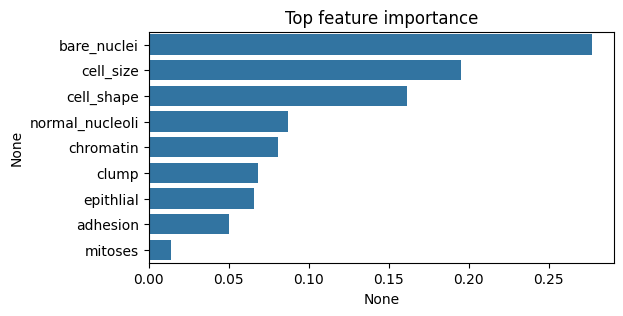

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

1.0
0.9560975609756097


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[317   0]
 [  0 161]]
[[124   3]
 [  6  72]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       317
           4       1.00      1.00      1.00       161

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       127
           4       0.96      0.92      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(ExtraTreesClassifier(n_jobs = -1, random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=ExtraTreesClassifier(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a1a0f8fc40>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a1a0daaf20>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a1a0f8f550>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a1a0f8f2b0>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

ExtraTreesClassifier(max_depth=8, min_impurity_decrease=0.0011304029876104081,
                     min_samples_split=12, n_jobs=-1, random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.9769874476987448
0.9560975609756097


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 8,
 'min_impurity_decrease': 0.0011304029876104081,
 'min_samples_leaf': 1,
 'min_samples_split': 12}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8,
  'min_impurity_decrease': 0.0009761972855462562,
  'min_samples_leaf': 15,
  'min_samples_split': 44},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0007585243326167404,
  'min_samples_leaf': 7,
  'min_samples_split': 20},
 {'max_depth': 8,
  'min_impurity_decrease': 0.00016389197338501942,
  'min_samples_leaf': 24,
  'min_samples_split': 37},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0008788798355756502,
  'min_samples_leaf': 22,
  'min_samples_split': 3},
 {'max_depth': 9,
  'min_impurity_decrease': 0.001015686904880464,
  'min_samples_leaf': 6,
  'min_samples_split': 3},
 {'max_depth': 6,
  'min_impurity_decrease': 0.0007792296605904882,
  'min_samples_leaf': 22,
  'min_samples_split': 45},
 {'max_depth': 10,
  'min_impurity_decrease': 0.0004203520542178461,
  'min_samples_leaf': 10,
  'min_samples_split': 29},
 {'max_depth': 4,
  'min_impurity_decrease': 0.0005207081903938791,
  'min_samples_leaf': 20,
  'min_samples_split': 4},
 {'max_depth': 6,
  'min_imp

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.9749122807017544

### 변수 중요도

In [ ]:
best_model.feature_importances_

array([0.0546, 0.2143, 0.1612, 0.0411, 0.0462, 0.3046, 0.0696, 0.1051,
       0.0033])

In [ ]:
f_imp_v = best_model.feature_importances_

In [ ]:
f_imp_v = pd.Series(f_imp_v, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

,0
bare_nuclei,0.304609
cell_size,0.214257
cell_shape,0.161166
normal_nucleoli,0.105106
chromatin,0.069637
clump,0.054635
epithlial,0.046152
adhesion,0.041118
mitoses,0.003320


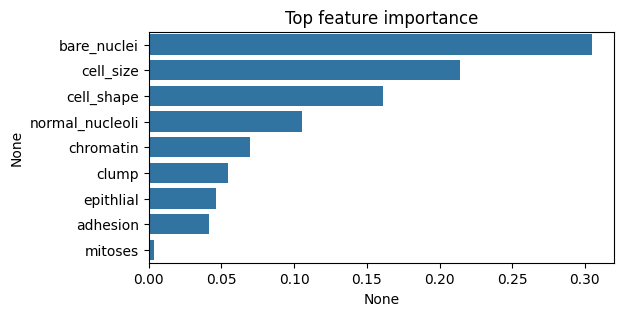

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.9769874476987448
0.9560975609756097


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[309   8]
 [  3 158]]
[[124   3]
 [  6  72]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98       317
           4       0.95      0.98      0.97       161

    accuracy                           0.98       478
   macro avg       0.97      0.98      0.97       478
weighted avg       0.98      0.98      0.98       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       127
           4       0.96      0.92      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
print(y_test)
y_test_new = label_encoder.fit_transform(y_test)
print(y_test_new)

304    4
149    4
217    2
120    2
314    2
      ..
268    4
360    4
238    4
634    2
572    2
Name: class, Length: 205, dtype: int64
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0]


In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test_new, y_test_proba1)

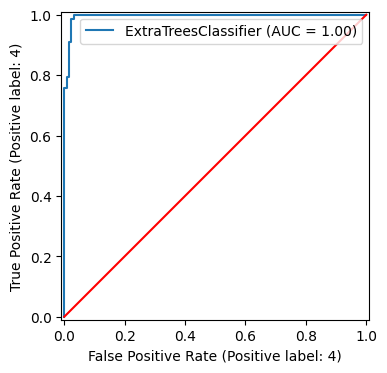

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_new, y_test_proba1))

0.9956591964465981


In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.9956591964465981
0.9956591964465981


## 그레이디언트 부스팅 - 유방암데이터

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.2444, 0.2381, 0.2284, 0.2259, 0.2366, 0.2551, 0.2528, 0.235 ,
       0.2373, 0.2375]), 'score_time': array([0.0045, 0.0044, 0.0042, 0.0042, 0.0041, 0.0041, 0.004 , 0.0041,
       0.0042, 0.0029]), 'test_score': array([0.9583, 1.    , 0.9375, 0.9583, 0.9583, 0.9583, 0.9792, 0.9792,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9644060283687944


### 모델 훈련 & 교차검증 - subsample

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(subsample = 0.1, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.2092, 0.2089, 0.228 , 0.2509, 0.2056, 0.2101, 0.2169, 0.2258,
       0.2126, 0.213 ]), 'score_time': array([0.0041, 0.0064, 0.0041, 0.0041, 0.0043, 0.0042, 0.0079, 0.0042,
       0.0042, 0.0026]), 'test_score': array([1.    , 0.9792, 0.9167, 0.9583, 0.9583, 0.9583, 1.    , 0.9792,
       0.9574, 0.9574]), 'train_score': array([0.9767, 0.9791, 0.986 , 0.9791, 0.9767, 0.9814, 0.9791, 0.9837,
       0.9791, 0.9861])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9807057680893541 0.9664893617021277


### 모델 훈련 & 교차검증 - 나무 개수 증가

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.4541, 0.4763, 0.4858, 0.4901, 0.4496, 0.4699, 0.4834, 0.4897,
       0.4509, 0.4379]), 'score_time': array([0.0042, 0.0043, 0.0061, 0.0043, 0.0043, 0.0044, 0.0044, 0.0043,
       0.0043, 0.0027]), 'test_score': array([0.9792, 0.9792, 0.9167, 0.9583, 0.9583, 0.9792, 0.9792, 0.9792,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9644060283687944


### 모델 훈련 & 교차검증 - 학습률 증가

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.2, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.2273, 0.2314, 0.2341, 0.248 , 0.2358, 0.2608, 0.2409, 0.234 ,
       0.235 , 0.2171]), 'score_time': array([0.0041, 0.0075, 0.0043, 0.0041, 0.0041, 0.0052, 0.0041, 0.0041,
       0.0043, 0.0027]), 'test_score': array([0.9792, 0.9792, 0.9167, 0.9583, 0.9583, 0.9792, 0.9792, 0.9583,
       0.9574, 0.9787]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.964450354609929


### 변수 중요도

In [ ]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, random_state=42)

In [ ]:
gb.feature_importances_

array([0.028 , 0.7661, 0.0361, 0.0061, 0.0178, 0.1138, 0.0182, 0.0126,
       0.0013])

In [ ]:
f_imp_v = gb.feature_importances_

In [ ]:
f_imp_v = pd.Series(f_imp_v, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

,0
cell_size,0.766097
bare_nuclei,0.113750
cell_shape,0.036092
clump,0.028019
chromatin,0.018247
epithlial,0.017753
normal_nucleoli,0.012624
adhesion,0.006136
mitoses,0.001282


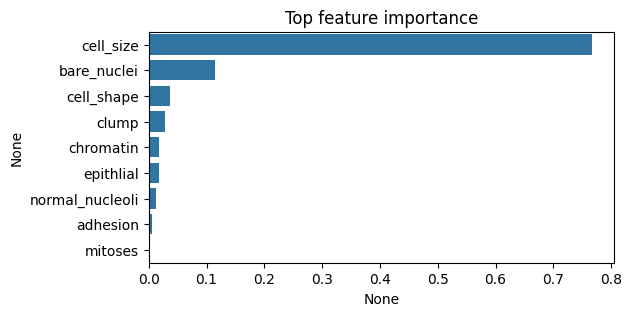

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

1.0
0.9609756097560975


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[317   0]
 [  0 161]]
[[124   3]
 [  5  73]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       317
           4       1.00      1.00      1.00       161

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

              precision    recall  f1-score   support

           2       0.96      0.98      0.97       127
           4       0.96      0.94      0.95        78

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a1a1b82b90>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a1a1b82e60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19e6d6bc0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a1a1b809d0>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

GradientBoostingClassifier(max_depth=2,
                           min_impurity_decrease=0.00026578929836197244,
                           min_samples_leaf=6, min_samples_split=17,
                           random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.9895397489539749
0.9560975609756097


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 2,
 'min_impurity_decrease': 0.00026578929836197244,
 'min_samples_leaf': 6,
 'min_samples_split': 17}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8,
  'min_impurity_decrease': 0.0009761972855462562,
  'min_samples_leaf': 15,
  'min_samples_split': 44},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0007585243326167404,
  'min_samples_leaf': 7,
  'min_samples_split': 20},
 {'max_depth': 8,
  'min_impurity_decrease': 0.00016389197338501942,
  'min_samples_leaf': 24,
  'min_samples_split': 37},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0008788798355756502,
  'min_samples_leaf': 22,
  'min_samples_split': 3},
 {'max_depth': 9,
  'min_impurity_decrease': 0.001015686904880464,
  'min_samples_leaf': 6,
  'min_samples_split': 3},
 {'max_depth': 6,
  'min_impurity_decrease': 0.0007792296605904882,
  'min_samples_leaf': 22,
  'min_samples_split': 45},
 {'max_depth': 10,
  'min_impurity_decrease': 0.0004203520542178461,
  'min_samples_leaf': 10,
  'min_samples_split': 29},
 {'max_depth': 4,
  'min_impurity_decrease': 0.0005207081903938791,
  'min_samples_leaf': 20,
  'min_samples_split': 4},
 {'max_depth': 6,
  'min_imp

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.968640350877193

### 변수 중요도

In [ ]:
best_model.feature_importances_

array([0.0308, 0.6344, 0.067 , 0.0078, 0.0024, 0.1881, 0.0589, 0.0104,
       0.0002])

In [ ]:
f_imp_v = best_model.feature_importances_

In [ ]:
f_imp_v = pd.Series(f_imp_v, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

,0
cell_size,0.634448
bare_nuclei,0.188124
cell_shape,0.066968
chromatin,0.058917
clump,0.030799
normal_nucleoli,0.010352
adhesion,0.007849
epithlial,0.002384
mitoses,0.000158


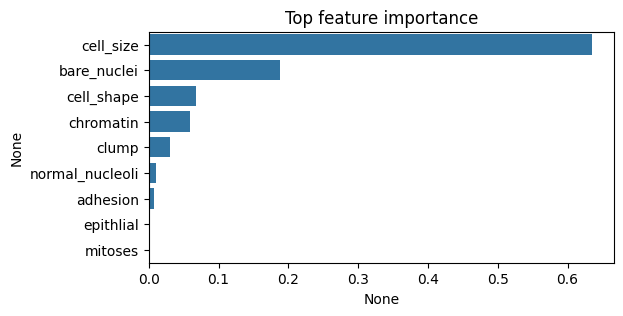

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.9895397489539749
0.9560975609756097


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[314   3]
 [  2 159]]
[[124   3]
 [  6  72]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       0.99      0.99      0.99       317
           4       0.98      0.99      0.98       161

    accuracy                           0.99       478
   macro avg       0.99      0.99      0.99       478
weighted avg       0.99      0.99      0.99       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       127
           4       0.96      0.92      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
print(y_test)
y_test_new = label_encoder.fit_transform(y_test)
print(y_test_new)

304    4
149    4
217    2
120    2
314    2
      ..
268    4
360    4
238    4
634    2
572    2
Name: class, Length: 205, dtype: int64
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0]


In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test_new, y_test_proba1)

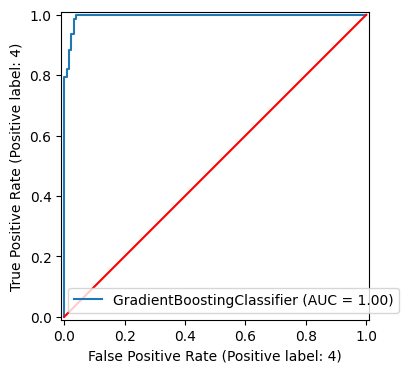

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.9954572986069048
0.9954572986069048


## 히스토그램 기반 그레이디언트 부스팅 - 유방암데이터

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.2169, 0.2159, 0.2116, 0.235 , 0.208 , 0.2017, 0.1916, 0.1947,
       0.1964, 0.1929]), 'score_time': array([0.0064, 0.0062, 0.0063, 0.0084, 0.0064, 0.0062, 0.0062, 0.0066,
       0.0063, 0.004 ]), 'test_score': array([0.9792, 0.9792, 0.9167, 0.9583, 0.9583, 0.9792, 0.9792, 0.9583,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.962322695035461


### 변수 중요도

In [ ]:
from sklearn.inspection import permutation_importance
f_imp_v = permutation_importance(hgb, X_train, y_train, n_repeats = 10, random_state=42)

In [ ]:
f_imp_v.importances_mean

array([0.0234, 0.0103, 0.0059, 0.0056, 0.0038, 0.0682, 0.0111, 0.0044,
       0.    ])

In [ ]:
f_imp_v = pd.Series(f_imp_v.importances_mean, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

,0
bare_nuclei,0.068201
clump,0.023431
chromatin,0.011088
cell_size,0.010251
cell_shape,0.005858
adhesion,0.005649
normal_nucleoli,0.004393
epithlial,0.003766
mitoses,0.000000


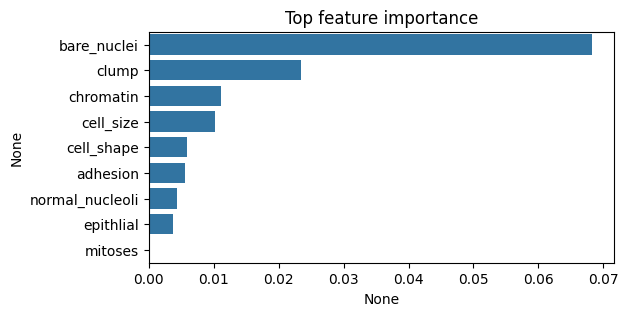

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = hgb.predict(X_train)
y_test_pred = hgb.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

1.0
0.9560975609756097


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[317   0]
 [  0 161]]
[[125   2]
 [  7  71]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       317
           4       1.00      1.00      1.00       161

    accuracy                           1.00       478
   macro avg       1.00      1.00      1.00       478
weighted avg       1.00      1.00      1.00       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       127
           4       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'max_depth': randint(2, 12),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=HistGradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19cee5660>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19ce297e0>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

HistGradientBoostingClassifier(max_depth=2, min_samples_leaf=1, random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.9916317991631799
0.9512195121951219


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 2, 'min_samples_leaf': 1}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8, 'min_samples_leaf': 20},
 {'max_depth': 9, 'min_samples_leaf': 21},
 {'max_depth': 8, 'min_samples_leaf': 19},
 {'max_depth': 8, 'min_samples_leaf': 11},
 {'max_depth': 9, 'min_samples_leaf': 21},
 {'max_depth': 5, 'min_samples_leaf': 8},
 {'max_depth': 9, 'min_samples_leaf': 3},
 {'max_depth': 7, 'min_samples_leaf': 21},
 {'max_depth': 3, 'min_samples_leaf': 24},
 {'max_depth': 7, 'min_samples_leaf': 2},
 {'max_depth': 6, 'min_samples_leaf': 1},
 {'max_depth': 11, 'min_samples_leaf': 22},
 {'max_depth': 10, 'min_samples_leaf': 17},
 {'max_depth': 11, 'min_samples_leaf': 16},
 {'max_depth': 4, 'min_samples_leaf': 12},
 {'max_depth': 8, 'min_samples_leaf': 20},
 {'max_depth': 10, 'min_samples_leaf': 3},
 {'max_depth': 6, 'min_samples_leaf': 19},
 {'max_depth': 8, 'min_samples_leaf': 21},
 {'max_depth': 10, 'min_samples_leaf': 7},
 {'max_depth': 3, 'min_samples_leaf': 4},
 {'max_depth': 10, 'min_samples_leaf': 14},
 {'max_depth': 3, 'min_samples_leaf': 9},
 {'max_depth'

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.9728289473684211

### 변수 중요도

In [ ]:
from sklearn.inspection import permutation_importance
f_imp_v = permutation_importance(best_model, X_train, y_train, n_repeats = 10, random_state=42)

In [ ]:
f_imp_v.importances_mean

array([0.0169, 0.0218, 0.0094, 0.0033, 0.0061, 0.1433, 0.0052, 0.0086,
       0.0004])

In [ ]:
f_imp_v = pd.Series(f_imp_v.importances_mean, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

,0
bare_nuclei,0.143305
cell_size,0.021757
clump,0.016946
cell_shape,0.009414
normal_nucleoli,0.008577
epithlial,0.006067
chromatin,0.005230
adhesion,0.003347
mitoses,0.000418


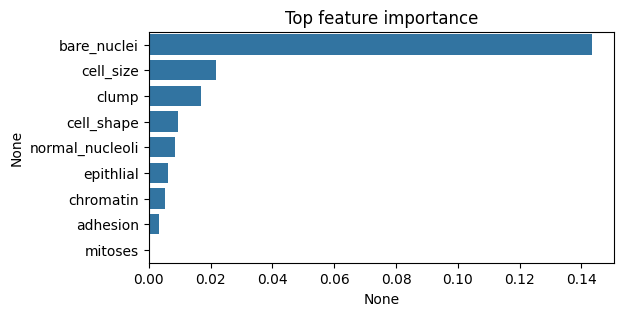

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]
[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.9916317991631799
0.9512195121951219


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[314   3]
 [  1 160]]
[[123   4]
 [  6  72]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           2       1.00      0.99      0.99       317
           4       0.98      0.99      0.99       161

    accuracy                           0.99       478
   macro avg       0.99      0.99      0.99       478
weighted avg       0.99      0.99      0.99       478

              precision    recall  f1-score   support

           2       0.95      0.97      0.96       127
           4       0.95      0.92      0.94        78

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
print(y_test)
y_test_new = label_encoder.fit_transform(y_test)
print(y_test_new)

304    4
149    4
217    2
120    2
314    2
      ..
268    4
360    4
238    4
634    2
572    2
Name: class, Length: 205, dtype: int64
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0]


In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test_new, y_test_proba1)

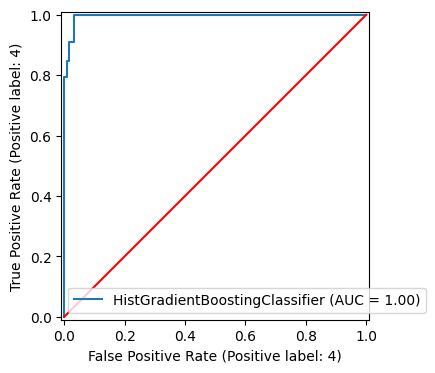

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.9957601453664446
0.9957601453664446


# 앙상블 - 혼자 해보기

## 랜덤포레스트 - HELOC 데이터

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/hwda02/data/HELOC_Data.xlsx', engine = 'openpyxl')
df.head()

,Age,Sex,Income,HELOC
0,30,Female,101000,0
1,25,Male,86000,0
2,20,Male,50000,0
3,26,Male,58000,0
4,18,Female,93000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     500 non-null    int64 
 1   Sex     500 non-null    object
 2   Income  500 non-null    int64 
 3   HELOC   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Sex'].unique()

array([' Female', ' Male'], dtype=object)

In [ ]:
df['Sex']= df['Sex'].str.replace(' ', '')

In [ ]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['HELOC'].unique()

array([0, 1])

In [ ]:
df['HELOC'].value_counts()

,count
HELOC,
0,370
1,130


In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Sex
print(df['Sex'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
print(df['Sex'])

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
495      Male
496      Male
497    Female
498    Female
499      Male
Name: Sex, Length: 500, dtype: object
0      0
1      1
2      1
3      1
4      0
      ..
495    1
496    1
497    0
498    0
499    1
Name: Sex, Length: 500, dtype: int64


In [ ]:
df.columns

Index(['Age', 'Sex', 'Income', 'HELOC'], dtype='object')

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.iloc[:,0:-1]
y = df['HELOC']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (500, 3)
y 데이터:  (500,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (350, 3)
test 데이터:  (150, 3)


### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.3463, 0.4098, 0.406 , 0.6169, 0.6141, 0.5865, 0.6541, 0.5815,
       0.6453, 0.526 ]), 'score_time': array([0.0449, 0.0496, 0.0507, 0.0598, 0.0392, 0.0563, 0.0419, 0.066 ,
       0.0675, 0.0401]), 'test_score': array([0.6857, 0.7429, 0.7714, 0.7714, 0.8   , 0.7143, 0.8   , 0.8   ,
       0.8   , 0.7429]), 'train_score': array([1.    , 1.    , 0.9968, 0.9968, 0.9968, 0.9968, 0.9968, 0.9968,
       0.9968, 0.9968])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974603174603175 0.7628571428571428


### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1, random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19f003d30>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a19f00bc70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a1a0fa9990>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19f00bc10>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

RandomForestClassifier(max_depth=11,
                       min_impurity_decrease=0.00018630201947649258,
                       min_samples_leaf=5, min_samples_split=27, n_jobs=-1,
                       random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.8514285714285714
0.8


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 11,
 'min_impurity_decrease': 0.00018630201947649258,
 'min_samples_leaf': 5,
 'min_samples_split': 27}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8,
  'min_impurity_decrease': 0.0009761972855462562,
  'min_samples_leaf': 15,
  'min_samples_split': 44},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0007585243326167404,
  'min_samples_leaf': 7,
  'min_samples_split': 20},
 {'max_depth': 8,
  'min_impurity_decrease': 0.00016389197338501942,
  'min_samples_leaf': 24,
  'min_samples_split': 37},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0008788798355756502,
  'min_samples_leaf': 22,
  'min_samples_split': 3},
 {'max_depth': 9,
  'min_impurity_decrease': 0.001015686904880464,
  'min_samples_leaf': 6,
  'min_samples_split': 3},
 {'max_depth': 6,
  'min_impurity_decrease': 0.0007792296605904882,
  'min_samples_leaf': 22,
  'min_samples_split': 45},
 {'max_depth': 10,
  'min_impurity_decrease': 0.0004203520542178461,
  'min_samples_leaf': 10,
  'min_samples_split': 29},
 {'max_depth': 4,
  'min_impurity_decrease': 0.0005207081903938791,
  'min_samples_leaf': 20,
  'min_samples_split': 4},
 {'max_depth': 6,
  'min_imp

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.8285714285714285

### 변수 중요도

In [ ]:
best_model.feature_importances_

array([0.343 , 0.4159, 0.2411])

In [ ]:
f_imp_v = best_model.feature_importances_

In [ ]:
f_imp_v = pd.Series(f_imp_v, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

,0
Sex,0.415916
Age,0.342992
Income,0.241093


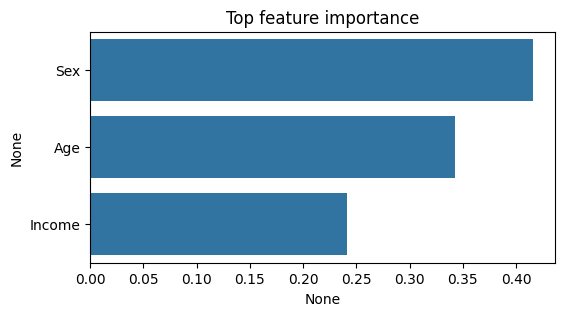

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 1]
[0 0 0 0 1]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.8514285714285714
0.8


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[243  19]
 [ 33  55]]
[[91 17]
 [13 29]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       262
           1       0.74      0.62      0.68        88

    accuracy                           0.85       350
   macro avg       0.81      0.78      0.79       350
weighted avg       0.85      0.85      0.85       350

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       108
           1       0.63      0.69      0.66        42

    accuracy                           0.80       150
   macro avg       0.75      0.77      0.76       150
weighted avg       0.81      0.80      0.80       150



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

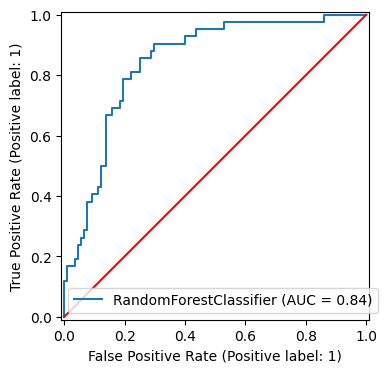

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.843915343915344
0.843915343915344


## 엑스트라트리 - HELOC 데이터

### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.412 , 0.3448, 0.2554, 0.273 , 0.2746, 0.25  , 0.27  , 0.2625,
       0.2439, 0.2357]), 'score_time': array([0.0509, 0.039 , 0.0387, 0.0388, 0.0393, 0.0383, 0.0379, 0.0398,
       0.0382, 0.0386]), 'test_score': array([0.6286, 0.7429, 0.7714, 0.7429, 0.8   , 0.7143, 0.7714, 0.8286,
       0.7714, 0.7714]), 'train_score': array([1.    , 1.    , 0.9968, 0.9968, 0.9968, 0.9968, 0.9968, 0.9968,
       0.9968, 0.9968])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974603174603175 0.7542857142857142


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators = 200, n_jobs = -1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.5282, 0.5425, 0.4751, 0.4843, 0.5159, 0.4894, 0.48  , 0.461 ,
       0.4846, 0.465 ]), 'score_time': array([0.0745, 0.0773, 0.0718, 0.0723, 0.0694, 0.0694, 0.0704, 0.0697,
       0.0721, 0.0705]), 'test_score': array([0.6286, 0.7429, 0.7714, 0.7429, 0.8   , 0.7143, 0.7714, 0.7714,
       0.7714, 0.7714]), 'train_score': array([1.    , 1.    , 0.9968, 0.9968, 0.9968, 0.9968, 0.9968, 0.9968,
       0.9968, 0.9968])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974603174603175 0.7485714285714286


### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(ExtraTreesClassifier(n_jobs = -1, random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=ExtraTreesClassifier(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19cee6470>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a19ce9ce20>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19cee6f80>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19e665420>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

ExtraTreesClassifier(max_depth=6, min_impurity_decrease=0.00016401295505928798,
                     min_samples_split=48, n_jobs=-1, random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.8028571428571428
0.7533333333333333


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 6,
 'min_impurity_decrease': 0.00016401295505928798,
 'min_samples_leaf': 1,
 'min_samples_split': 48}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8,
  'min_impurity_decrease': 0.0009761972855462562,
  'min_samples_leaf': 15,
  'min_samples_split': 44},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0007585243326167404,
  'min_samples_leaf': 7,
  'min_samples_split': 20},
 {'max_depth': 8,
  'min_impurity_decrease': 0.00016389197338501942,
  'min_samples_leaf': 24,
  'min_samples_split': 37},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0008788798355756502,
  'min_samples_leaf': 22,
  'min_samples_split': 3},
 {'max_depth': 9,
  'min_impurity_decrease': 0.001015686904880464,
  'min_samples_leaf': 6,
  'min_samples_split': 3},
 {'max_depth': 6,
  'min_impurity_decrease': 0.0007792296605904882,
  'min_samples_leaf': 22,
  'min_samples_split': 45},
 {'max_depth': 10,
  'min_impurity_decrease': 0.0004203520542178461,
  'min_samples_leaf': 10,
  'min_samples_split': 29},
 {'max_depth': 4,
  'min_impurity_decrease': 0.0005207081903938791,
  'min_samples_leaf': 20,
  'min_samples_split': 4},
 {'max_depth': 6,
  'min_imp

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.78

### 변수 중요도

In [ ]:
best_model.feature_importances_

array([0.2181, 0.692 , 0.0899])

In [ ]:
f_imp_v = best_model.feature_importances_

In [ ]:
f_imp_v = pd.Series(f_imp_v, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

,0
Sex,0.692020
Age,0.218102
Income,0.089878


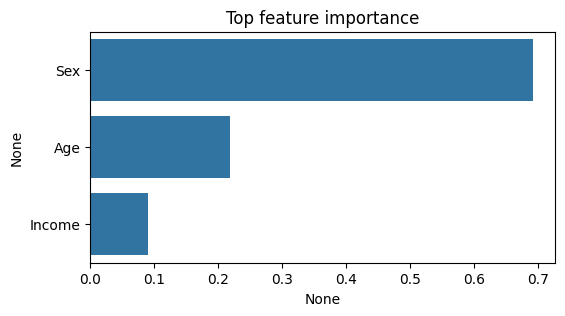

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 1]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.8028571428571428
0.7533333333333333


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[257   5]
 [ 64  24]]
[[102   6]
 [ 31  11]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       262
           1       0.83      0.27      0.41        88

    accuracy                           0.80       350
   macro avg       0.81      0.63      0.65       350
weighted avg       0.81      0.80      0.76       350

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       108
           1       0.65      0.26      0.37        42

    accuracy                           0.75       150
   macro avg       0.71      0.60      0.61       150
weighted avg       0.73      0.75      0.71       150



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

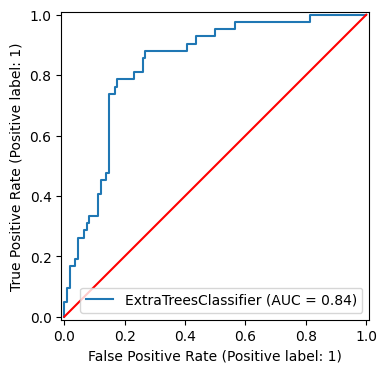

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8357583774250441
0.8357583774250441


## 그레이디언트 부스팅 - HELOC 데이터

### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.2526, 0.4418, 0.2661, 0.2514, 0.2269, 0.2211, 0.2152, 0.2212,
       0.2218, 0.1664]), 'score_time': array([0.0096, 0.0069, 0.0045, 0.0055, 0.0041, 0.004 , 0.0065, 0.0041,
       0.0042, 0.0027]), 'test_score': array([0.7714, 0.7143, 0.7429, 0.7714, 0.8   , 0.7429, 0.8   , 0.8   ,
       0.7714, 0.7429]), 'train_score': array([0.9397, 0.9524, 0.9429, 0.9429, 0.946 , 0.9365, 0.9365, 0.9397,
       0.9333, 0.9429])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9412698412698413 0.7657142857142858


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(subsample = 0.1, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.2428, 0.2048, 0.207 , 0.2009, 0.2104, 0.2119, 0.2369, 0.2194,
       0.2013, 0.2014]), 'score_time': array([0.0059, 0.0042, 0.004 , 0.0041, 0.0042, 0.004 , 0.0052, 0.0046,
       0.0042, 0.0037]), 'test_score': array([0.7429, 0.7714, 0.8286, 0.8286, 0.8   , 0.7429, 0.7143, 0.8571,
       0.8   , 0.8   ]), 'train_score': array([0.8698, 0.8444, 0.8222, 0.8476, 0.8222, 0.8698, 0.8476, 0.8476,
       0.8381, 0.8413])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8450793650793651 0.7885714285714286


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.6104, 0.7327, 0.9017, 0.6155, 0.6911, 0.6846, 0.7595, 0.7942,
       0.7978, 0.7067]), 'score_time': array([0.0147, 0.014 , 0.0103, 0.0038, 0.0108, 0.0187, 0.0072, 0.0037,
       0.0083, 0.0037]), 'test_score': array([0.8   , 0.7429, 0.7714, 0.8   , 0.7714, 0.8   , 0.7429, 0.7429,
       0.8286, 0.7143]), 'train_score': array([0.981 , 0.9873, 0.9778, 0.9905, 0.9841, 0.9841, 0.981 , 0.9873,
       0.9873, 0.9905])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9850793650793651 0.7714285714285716


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.2, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.3298, 0.3957, 0.3872, 0.3696, 0.3824, 0.3855, 0.4318, 0.4176,
       0.428 , 0.4182]), 'score_time': array([0.0041, 0.0054, 0.011 , 0.011 , 0.0119, 0.0143, 0.0111, 0.0109,
       0.006 , 0.0042]), 'test_score': array([0.7429, 0.7714, 0.7429, 0.7714, 0.7714, 0.7429, 0.7714, 0.7429,
       0.8286, 0.7143]), 'train_score': array([0.9841, 0.9873, 0.9841, 0.9937, 0.9873, 0.9841, 0.9778, 0.9873,
       0.9873, 0.9905])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9863492063492064 0.76


### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'min_impurity_decrease': uniform(0.0001, 0.0011),
          'max_depth': randint(2, 12),
          'min_samples_split': randint(2, 52),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a1a1279f90>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a19cc852d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19cc61090>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19ce333a0>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

GradientBoostingClassifier(max_depth=2,
                           min_impurity_decrease=0.00016991418531462602,
                           min_samples_leaf=23, min_samples_split=25,
                           random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.8514285714285714
0.78


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 2,
 'min_impurity_decrease': 0.00016991418531462602,
 'min_samples_leaf': 23,
 'min_samples_split': 25}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8,
  'min_impurity_decrease': 0.0009761972855462562,
  'min_samples_leaf': 15,
  'min_samples_split': 44},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0007585243326167404,
  'min_samples_leaf': 7,
  'min_samples_split': 20},
 {'max_depth': 8,
  'min_impurity_decrease': 0.00016389197338501942,
  'min_samples_leaf': 24,
  'min_samples_split': 37},
 {'max_depth': 9,
  'min_impurity_decrease': 0.0008788798355756502,
  'min_samples_leaf': 22,
  'min_samples_split': 3},
 {'max_depth': 9,
  'min_impurity_decrease': 0.001015686904880464,
  'min_samples_leaf': 6,
  'min_samples_split': 3},
 {'max_depth': 6,
  'min_impurity_decrease': 0.0007792296605904882,
  'min_samples_leaf': 22,
  'min_samples_split': 45},
 {'max_depth': 10,
  'min_impurity_decrease': 0.0004203520542178461,
  'min_samples_leaf': 10,
  'min_samples_split': 29},
 {'max_depth': 4,
  'min_impurity_decrease': 0.0005207081903938791,
  'min_samples_leaf': 20,
  'min_samples_split': 4},
 {'max_depth': 6,
  'min_imp

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.8257142857142858

### 변수 중요도

In [ ]:
best_model.feature_importances_

array([0.3196, 0.4868, 0.1936])

In [ ]:
f_imp_v = best_model.feature_importances_

In [ ]:
f_imp_v = pd.Series(f_imp_v, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

,0
Sex,0.486788
Age,0.319593
Income,0.193619


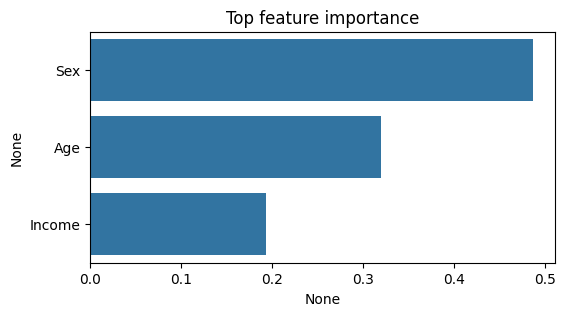

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 1]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.8514285714285714
0.78


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[239  23]
 [ 29  59]]
[[87 21]
 [12 30]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       262
           1       0.72      0.67      0.69        88

    accuracy                           0.85       350
   macro avg       0.81      0.79      0.80       350
weighted avg       0.85      0.85      0.85       350

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       108
           1       0.59      0.71      0.65        42

    accuracy                           0.78       150
   macro avg       0.73      0.76      0.74       150
weighted avg       0.80      0.78      0.79       150



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

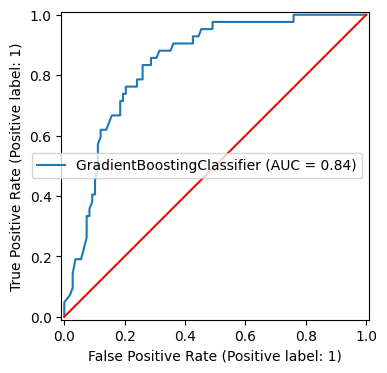

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8399470899470899
0.8399470899470899


## 히스토그램 기반 그레이디언트 부스팅 - HELOC 데이터

### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.2542, 0.4759, 0.1895, 0.1945, 0.3985, 0.1802, 0.3012, 0.2907,
       0.2883, 0.2912]), 'score_time': array([0.0072, 0.0143, 0.0058, 0.0062, 0.0155, 0.0181, 0.0056, 0.0192,
       0.017 , 0.0062]), 'test_score': array([0.8   , 0.7714, 0.7143, 0.8286, 0.7714, 0.8   , 0.7714, 0.7714,
       0.7714, 0.7714]), 'train_score': array([0.9397, 0.9619, 0.9302, 0.946 , 0.9492, 0.9556, 0.9492, 0.9492,
       0.9429, 0.9397])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9463492063492064 0.7771428571428572


### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
# 하이퍼파라미터 값 설정
params = {'max_depth': randint(2, 12),
          'min_samples_leaf': randint(1, 26)}

In [ ]:
rs = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=42),
                        params, n_iter = 100, n_jobs = -1, random_state=42)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=HistGradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19cc84250>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a19d43b4c0>},
                   random_state=42)

In [ ]:
# 최적 모델
best_model = rs.best_estimator_
best_model

HistGradientBoostingClassifier(max_depth=2, min_samples_leaf=25,
                               random_state=42)

In [ ]:
# 정확도
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.8542857142857143
0.78


In [ ]:
# 최적 모델의 매개변수
rs.best_params_

{'max_depth': 2, 'min_samples_leaf': 25}

In [ ]:
rs.cv_results_['params']

[{'max_depth': 8, 'min_samples_leaf': 20},
 {'max_depth': 9, 'min_samples_leaf': 21},
 {'max_depth': 8, 'min_samples_leaf': 19},
 {'max_depth': 8, 'min_samples_leaf': 11},
 {'max_depth': 9, 'min_samples_leaf': 21},
 {'max_depth': 5, 'min_samples_leaf': 8},
 {'max_depth': 9, 'min_samples_leaf': 3},
 {'max_depth': 7, 'min_samples_leaf': 21},
 {'max_depth': 3, 'min_samples_leaf': 24},
 {'max_depth': 7, 'min_samples_leaf': 2},
 {'max_depth': 6, 'min_samples_leaf': 1},
 {'max_depth': 11, 'min_samples_leaf': 22},
 {'max_depth': 10, 'min_samples_leaf': 17},
 {'max_depth': 11, 'min_samples_leaf': 16},
 {'max_depth': 4, 'min_samples_leaf': 12},
 {'max_depth': 8, 'min_samples_leaf': 20},
 {'max_depth': 10, 'min_samples_leaf': 3},
 {'max_depth': 6, 'min_samples_leaf': 19},
 {'max_depth': 8, 'min_samples_leaf': 21},
 {'max_depth': 10, 'min_samples_leaf': 7},
 {'max_depth': 3, 'min_samples_leaf': 4},
 {'max_depth': 10, 'min_samples_leaf': 14},
 {'max_depth': 3, 'min_samples_leaf': 9},
 {'max_depth'

In [ ]:
len(rs.cv_results_['mean_test_score'])

100

In [ ]:
np.max(rs.cv_results_['mean_test_score'])

0.8171428571428571

### 변수 중요도

In [ ]:
from sklearn.inspection import permutation_importance
f_imp_v = permutation_importance(best_model, X_train, y_train, n_repeats = 10, random_state=42)

In [ ]:
f_imp_v.importances_mean

array([0.0826, 0.1429, 0.0503])

In [ ]:
f_imp_v = pd.Series(f_imp_v.importances_mean, index = X.columns)

In [ ]:
f_imp_v.sort_values(ascending = False)

,0
Sex,0.142857
Age,0.082571
Income,0.050286


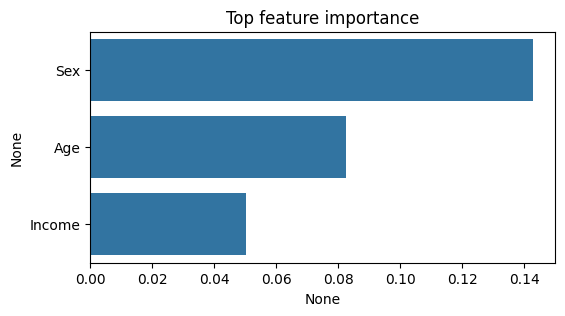

In [ ]:
f_top = f_imp_v.sort_values(ascending = False)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()

### 성능평가

In [ ]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 1]
[0 0 0 0 1]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.8542857142857143
0.78


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[240  22]
 [ 29  59]]
[[87 21]
 [12 30]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       262
           1       0.73      0.67      0.70        88

    accuracy                           0.85       350
   macro avg       0.81      0.79      0.80       350
weighted avg       0.85      0.85      0.85       350

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       108
           1       0.59      0.71      0.65        42

    accuracy                           0.78       150
   macro avg       0.73      0.76      0.74       150
weighted avg       0.80      0.78      0.79       150



In [ ]:
# ROC - 1 기준
y_test_proba1 = best_model.predict_proba(X_test)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

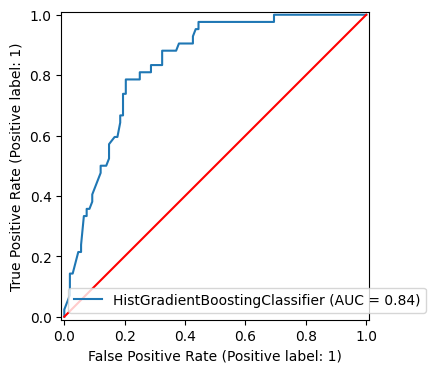

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8365299823633157
0.8365299823633157


# 오류 해결

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.0


In [ ]:
!pip install scikit-learn==1.5.2
# 런타임 다시 시작

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
import sklearn
print(sklearn.__version__)

1.5.2


## 데이터 준비 - 유방암데이터

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hwda02/data/breast-cancer-wisconsin.data', header = None)
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']
df['bare_nuclei'].replace("?", np.nan, inplace = True)
df.dropna(subset = 'bare_nuclei', axis = 0, inplace = True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')
df.head()

<ipython-input-23-ad15fec9ffec>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bare_nuclei'].replace("?", np.nan, inplace = True)


,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# 데이터 분할
# 전체 데이터
X = df.drop(['id', 'class'], axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (683, 9)
y 데이터:  (683,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (478, 9)
test 데이터:  (205, 9)


## Xgboost - 유방암데이터

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
print(y_train)
y_train = label_encoder.fit_transform(y_train)
print(y_train)

183    4
472    2
444    2
85     4
516    2
      ..
73     4
108    2
279    4
450    2
104    4
Name: class, Length: 478, dtype: int64
[1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0
 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 

In [ ]:
from sklearn.model_selection import cross_validate
from xgboost import  XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state=42)
scores = cross_validate(xgb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.0767, 0.1024, 0.0493, 0.0469, 0.0454, 0.0435, 0.0454, 0.0436,
       0.0472, 0.0449]), 'score_time': array([0.0105, 0.0108, 0.0096, 0.0094, 0.0097, 0.0096, 0.0098, 0.0097,
       0.0096, 0.0099]), 'test_score': array([0.9167, 0.9792, 0.9375, 0.9583, 0.9583, 0.9583, 0.9792, 0.9792,
       0.9362, 0.9787]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9581560283687944


In [ ]:
# 기본값은 auto, 데이터 크기에 따라서 알아서 선택해줌
# 보통 exact 는 작은 데이터, approx 는 큰 데이터에서 사용
from sklearn.model_selection import cross_validate
from xgboost import  XGBClassifier
xgb = XGBClassifier(tree_method = 'exact', n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)
scores = cross_validate(xgb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

{'fit_time': array([0.4408, 0.3038, 0.2294, 0.2132, 0.2226, 0.235 , 0.2357, 0.2342,
       0.2265, 0.1715]), 'score_time': array([0.0165, 0.0206, 0.0105, 0.0127, 0.01  , 0.01  , 0.0099, 0.01  ,
       0.0098, 0.0063]), 'test_score': array([0.9375, 0.9792, 0.9375, 0.9583, 0.9375, 0.9583, 0.9792, 0.9792,
       0.9574, 0.9787]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9602836879432625


In [ ]:
xgb.tree_method

'exact'

## Lightgbm - 유방암데이터

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


{'fit_time': array([0.1686, 0.097 , 0.0874, 0.1093, 0.0963, 0.0873, 0.0878, 0.0817,
       0.0871, 0.0696]), 'score_time': array([0.0145, 0.0067, 0.0109, 0.0086, 0.0043, 0.0046, 0.0043, 0.0063,
       0.0077, 0.004 ]), 'test_score': array([0.9792, 0.9583, 0.9167, 0.9583, 0.9375, 0.9792, 0.9792, 0.9583,
       0.9574, 0.9574]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9581560283687944


# Feature selection - feature importance

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

## 데이터 준비 - 유방암데이터

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hwda02/data/breast-cancer-wisconsin.data', header = None)
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']
df['bare_nuclei'].replace("?", np.nan, inplace = True)
df.dropna(subset = 'bare_nuclei', axis = 0, inplace = True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')
df.head()

<ipython-input-23-ad15fec9ffec>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bare_nuclei'].replace("?", np.nan, inplace = True)


,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# 데이터 분할
# 전체 데이터
X = df.drop(['id', 'class'], axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (683, 9)
y 데이터:  (683,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (478, 9)
test 데이터:  (205, 9)


In [ ]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

class
2    0.66318
4    0.33682
Name: proportion, dtype: float64
class
2    0.619512
4    0.380488
Name: proportion, dtype: float64


## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
feature_importances = pd.Series(rf.feature_importances_, index = X_train.columns)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis = 0)
print('테스트 점수:', rf.score(X_test, y_test))

테스트 점수: 0.9512195121951219


### 시각화 - Feature Importance

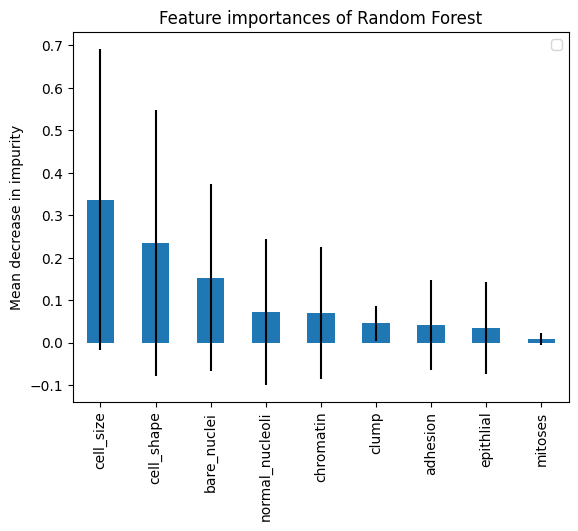

In [ ]:
df_feature_importance = pd.DataFrame({'importance': feature_importances, 'std': std})
df_feature_importance = df_feature_importance.sort_values('importance', ascending=False)
fig, ax = plt.subplots()
df_feature_importance.plot.bar(y = 'importance', yerr = 'std', ax = ax)
ax.set_title("Feature importances of Random Forest")
ax.set_ylabel("Mean decrease in impurity")
ax.legend([])
plt.show()

### Feature Importance 이용한 Feature Selection

In [ ]:
rf_selected = SelectFromModel(rf, prefit = True)
X_train_new = rf_selected.transform(X_train)

print('Shape of transformed Train set: ', X_train_new.shape)
feature_names = X_train.columns[rf_selected.get_support()]
print('Feature Names: ', feature_names)

Shape of transformed Train set:  (478, 3)
Feature Names:  Index(['cell_size', 'cell_shape', 'bare_nuclei'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
rf_selected = SelectFromModel(rf, prefit = True, threshold = 0.01)
X_train_new = rf_selected.transform(X_train)

print('Shape of transformed Train set: ', X_train_new.shape)
feature_names = X_train.columns[rf_selected.get_support()]
print('Feature Names: ', feature_names)

Shape of transformed Train set:  (478, 8)
Feature Names:  Index(['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
       'bare_nuclei', 'chromatin', 'normal_nucleoli'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### feature selection 데이터로 다시 모델 만들기

In [ ]:
X_train_new = pd.DataFrame(X_train_new, columns = feature_names)
X_test_new = X_test[feature_names]

In [ ]:
rf_modified = RandomForestClassifier(n_estimators=100, random_state=42)
rf_modified.fit(X_train_new, y_train)
print('테스트 점수:', rf_modified.score(X_test_new, y_test))

테스트 점수: 0.9658536585365853


## Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 100, random_state = 42)
gbc.fit(X_train,y_train)
feature_importances = pd.Series(gbc.feature_importances_, index = X_train.columns)

print('테스트 점수:', gbc.score(X_test, y_test))

테스트 점수: 0.9560975609756097


### 시각화 - Feature Importance

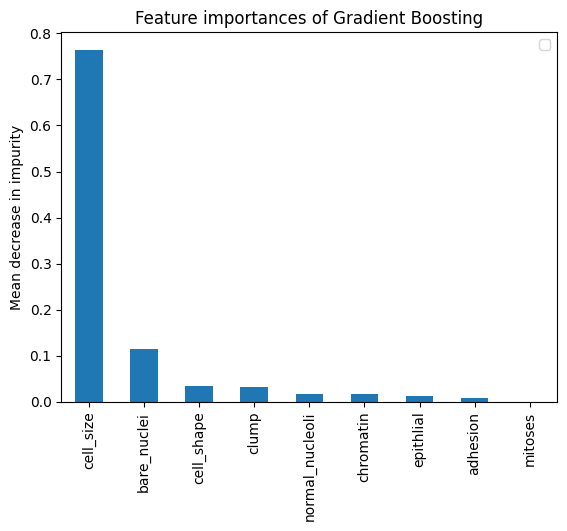

In [ ]:
df_feature_importance = pd.DataFrame({'importance': feature_importances})
df_feature_importance = df_feature_importance.sort_values('importance', ascending=False)
fig, ax = plt.subplots()
df_feature_importance.plot.bar(y = 'importance', ax = ax)
ax.set_title("Feature importances of Gradient Boosting")
ax.set_ylabel("Mean decrease in impurity")
ax.legend([])
plt.show()

### Feature Importance 이용한 Feature Selection

In [ ]:
gbc_selected = SelectFromModel(gbc, prefit = True)
X_train_new = gbc_selected.transform(X_train)

print('Shape of transformed Train set: ', X_train_new.shape)
feature_names = X_train.columns[gbc_selected.get_support()]
print('Feature Names: ', feature_names)

Shape of transformed Train set:  (478, 2)
Feature Names:  Index(['cell_size', 'bare_nuclei'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
gbc_selected = SelectFromModel(gbc, prefit = True, threshold = 0.01)
X_train_new = gbc_selected.transform(X_train)

print('Shape of transformed Train set: ', X_train_new.shape)
feature_names = X_train.columns[gbc_selected.get_support()]
print('Feature Names: ', feature_names)

Shape of transformed Train set:  (478, 7)
Feature Names:  Index(['clump', 'cell_size', 'cell_shape', 'epithlial', 'bare_nuclei',
       'chromatin', 'normal_nucleoli'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### feature selection 데이터로 다시 모델 만들기

In [ ]:
X_train_new = pd.DataFrame(X_train_new, columns = feature_names)
X_test_new = X_test[feature_names]

In [ ]:
gbc_modified = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_modified.fit(X_train_new, y_train)
print('테스트 점수:', gbc_modified.score(X_test_new, y_test))

테스트 점수: 0.9365853658536586


# 비지도 학습

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 거리 계산

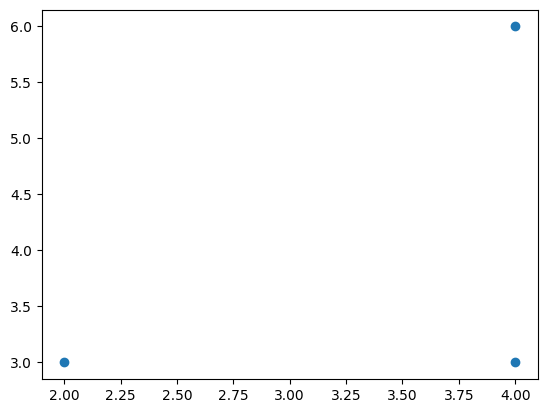

In [ ]:
# x, y
d = np.array([[2, 3], [4, 6], [4, 3]])
plt.plot(d[:, 0], d[:, 1], 'o')
plt.show()

### 유클리디언 거리

In [ ]:
# 유클리디언 거리
np.sqrt((4 - 2) ** 2 + (6 - 3) ** 2)

3.605551275463989

In [ ]:
from scipy.spatial import distance
distance.pdist(d, metric='euclidean')

array([3.6056, 2.    , 3.    ])

### 맨해튼 거리

In [ ]:
# 맨해튼 거리
(4 - 2) + (6 - 3)

5

In [ ]:
from scipy.spatial import distance
distance.pdist(d, metric='cityblock')

array([5., 2., 3.])

### 체비셰프 거리

In [ ]:
# 체비셰프 거리
max((4 - 2), (6 - 3))

3

In [ ]:
from scipy.spatial import distance
distance.pdist(d, metric='chebyshev')

array([3., 2., 3.])

### 표준화 거리

In [ ]:
# 표준화 거리
d_var = np.var(d, axis = 0, ddof = 1)
d_var

array([1.3333, 3.    ])

In [ ]:
np.sqrt(((4 - 2) ** 2 / d_var[0]) + ((6 - 3) ** 2 / d_var[1]))

2.449489742783178

In [ ]:
from scipy.spatial import distance
distance.pdist(d, metric='seuclidean', V = d_var)

array([2.4495, 1.7321, 1.7321])

In [ ]:
from scipy.spatial import distance
distance.pdist(d, metric='seuclidean')

array([2.4495, 1.7321, 1.7321])

### 마할라노비스 거리

In [ ]:
# 마할라노비스 거리
from numpy import *
from numpy.linalg import *
d_cov = inv(cov(d.T)).T
d_cov

array([[ 1.    , -0.3333],
       [-0.3333,  0.4444]])

In [ ]:
from scipy.spatial import distance
distance.pdist(d, metric='mahalanobis', VI = d_cov)

array([2., 2., 2.])

In [ ]:
from scipy.spatial import distance
distance.pdist(d, metric='mahalanobis')

array([2., 2., 2.])

### 민코프스키 거리

In [ ]:
# 민코프스키 거리
from scipy.spatial import distance
distance.pdist(d, metric='minkowski', p = 2) # 유클리디안 거리

array([3.6056, 2.    , 3.    ])

In [ ]:
distance.pdist(d, metric='minkowski', p = 1) # 맨해튼 거리

array([5., 2., 3.])

## KMC - 캔디바 데이터

### 데이터 준비

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/hwda02/data/CandyBars.xlsx', engine = 'openpyxl')
df.head()

,Brands,Calories,Fat,Protein,Carb
0,Peanut Butter Twix,311.0,18.5,5.3,31.4
1,Baby Ruth,275.0,13.0,3.2,39.0
2,Caramel Twix,284.5,14.0,2.5,37.5
3,5th Avenue,279.5,12.5,4.5,41.0
4,Snickers,273.0,14.0,4.5,34.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brands    37 non-null     object 
 1   Calories  37 non-null     float64
 2   Fat       37 non-null     float64
 3   Protein   37 non-null     float64
 4   Carb      37 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.6+ KB


In [ ]:
df.drop('Brands', axis = 1).describe()

,Calories,Fat,Protein,Carb
count,37.000000,37.000000,37.000000,37.000000
mean,225.864865,10.529730,3.135135,32.394595
std,37.910649,4.121681,1.723242,9.158995
min,139.000000,1.000000,0.000000,19.000000
25%,209.000000,8.500000,2.000000,28.500000
50%,229.500000,11.500000,2.500000,31.500000
75%,245.500000,13.000000,4.500000,34.000000
max,311.000000,18.500000,7.000000,66.000000


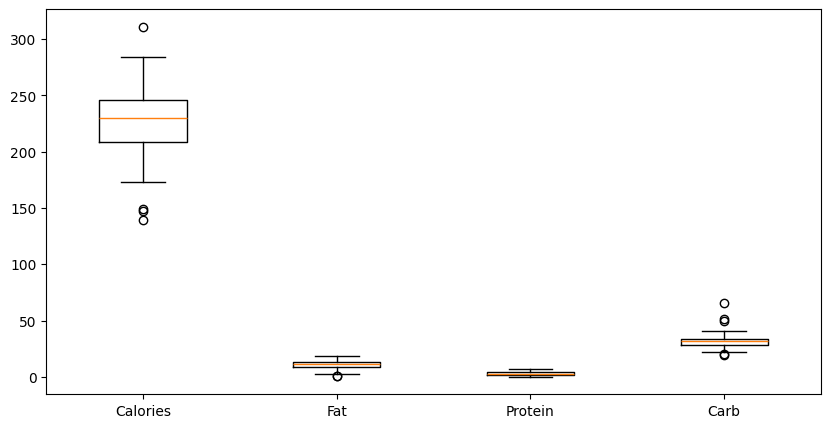

In [ ]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(x = [df['Calories'], df['Fat'], df['Protein'], df['Carb']],
           labels = df.drop('Brands', axis = 1).columns)
plt.show()

In [ ]:
df.columns

Index(['Brands', 'Calories', 'Fat', 'Protein', 'Carb'], dtype='object')

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.drop('Brands', axis = 1)

print("X 데이터: ", X.shape)

X 데이터:  (37, 4)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X)
X_scale = standard.transform(X)

In [ ]:
df_scale = pd.DataFrame(X_scale, columns = X.columns)

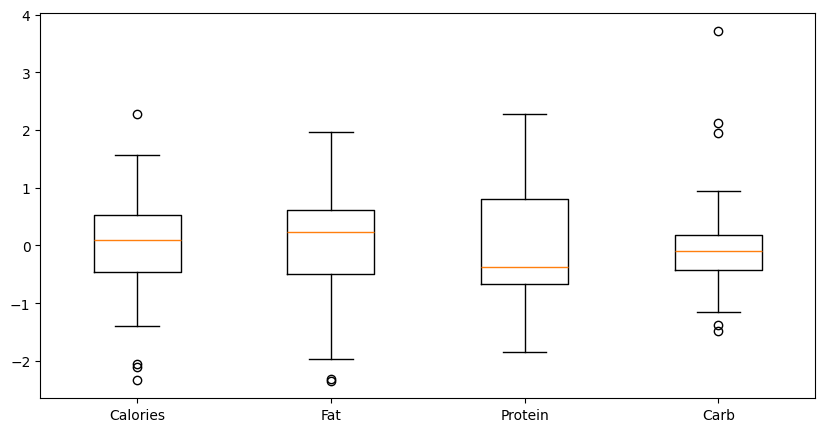

In [ ]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(x = [df_scale['Calories'], df_scale['Fat'], df_scale['Protein'], df_scale['Carb']],
           labels = df_scale.columns)
plt.show()

### 모델 적용

In [ ]:
# 모델
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 3, n_init = 'auto', random_state=42)
kmc.fit(X_scale)

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmc.labels_

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int32)

In [ ]:
np.unique(kmc.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([18, 10,  9]))

In [ ]:
kmc.cluster_centers_
# 각 클러스터 중심 평균 값
# 행이 군집, 열이 변수

array([[-0.2036,  0.3958,  0.0512, -0.6033],
       [-0.7224, -1.3823, -1.0208,  0.8883],
       [ 1.21  ,  0.7443,  1.0317,  0.2195]])

In [ ]:
pd.DataFrame(kmc.cluster_centers_, columns = X.columns)

,Calories,Fat,Protein,Carb
0,-0.203634,0.395799,0.051234,-0.603268
1,-0.722422,-1.382263,-1.020790,0.888319
2,1.209960,0.744250,1.031744,0.219515


In [ ]:
print(kmc.transform(X_scale[:5]))
print(kmc.labels_[:5])

[[3.2152 5.1409 1.6685]
 [2.0319 3.0418 1.1307]
 [2.2122 3.2815 1.4949]
 [2.3825 3.3863 0.8411]
 [1.8783 3.5724 0.2619]]
[2 2 2 2 2]


In [ ]:
# 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환
# 하나의 샘플에 대한 클러스터 3개의 거리
# 3 번째 클러스터까지의 거리가 가장 작음 = 2 번 레이블에 속함

In [ ]:
kmc.n_iter_
# 알고리즘 반복 횟수

3

#### 엘보 방법

In [ ]:
# 최적의 k값
distortions = []
for k in range(1,11):
  kmc = KMeans(n_clusters = k, n_init = 'auto', random_state=42)
  kmc.fit(X_scale)
  distortions.append(kmc.inertia_)

In [ ]:
print(distortions)

[147.99999999999997, 89.57196734082763, 67.0237374638589, 48.052882424993264, 38.79806167027837, 33.3858352390304, 25.883545260433355, 24.13373818754375, 19.729430512148404, 16.984329465944306]


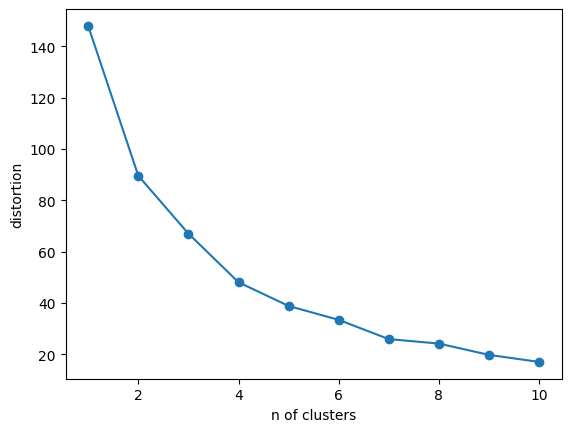

In [ ]:
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('n of clusters')
plt.ylabel('distortion')
plt.show()

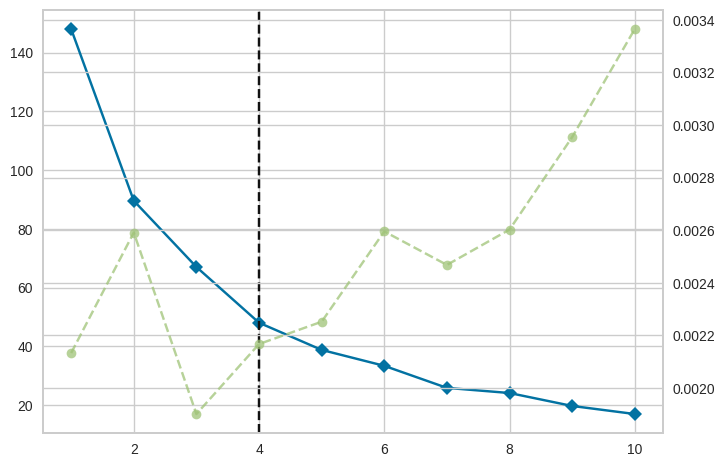

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
kmc = KMeans(n_init = 'auto', random_state=42)
vis = KElbowVisualizer(kmc, k = (1,11))
vis.fit(X_scale)
plt.show()

#### 실루엣 점수

In [ ]:
# 실루엣 점수
from sklearn.metrics import silhouette_score
for k in range(2,5):
  kmc = KMeans(n_clusters = k, n_init = 'auto', random_state=42)
  kmc.fit(X_scale)
  y_pred = kmc.labels_
  print(k, ": ", silhouette_score(X_scale, y_pred, metric='euclidean'))

2 :  0.3842169400021826
3 :  0.2960168394907411
4 :  0.3277666710413639


### 최적 모델

In [ ]:
# 모델 k = 2
from sklearn.cluster import KMeans
kmc2 = KMeans(n_clusters = 2, n_init = 'auto', random_state=42)
kmc2.fit(X_scale)

KMeans(n_clusters=2, random_state=42)

In [ ]:
kmc2.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int32)

In [ ]:
df_X = X
df_X['cluster'] = kmc2.labels_
df_X.head()

,Calories,Fat,Protein,Carb,cluster
0,311.0,18.5,5.3,31.4,0
1,275.0,13.0,3.2,39.0,0
2,284.5,14.0,2.5,37.5,0
3,279.5,12.5,4.5,41.0,0
4,273.0,14.0,4.5,34.0,0


In [ ]:
clusters = df_X.groupby('cluster')

In [ ]:
print(clusters.mean())
print(clusters.size())
# 군집1 낮은 칼로리, 지방, 단백질, 높은 탄수화물 10개의 초코바
# 군집0 높은 칼로리, 지방, 단백질, 낮은 탄수화물 27개의 초코바

          Calories        Fat   Protein       Carb
cluster                                           
0        235.87037  12.611111  3.777778  29.422222
1        198.85000   4.910000  1.400000  40.420000
cluster
0    27
1    10
dtype: int64


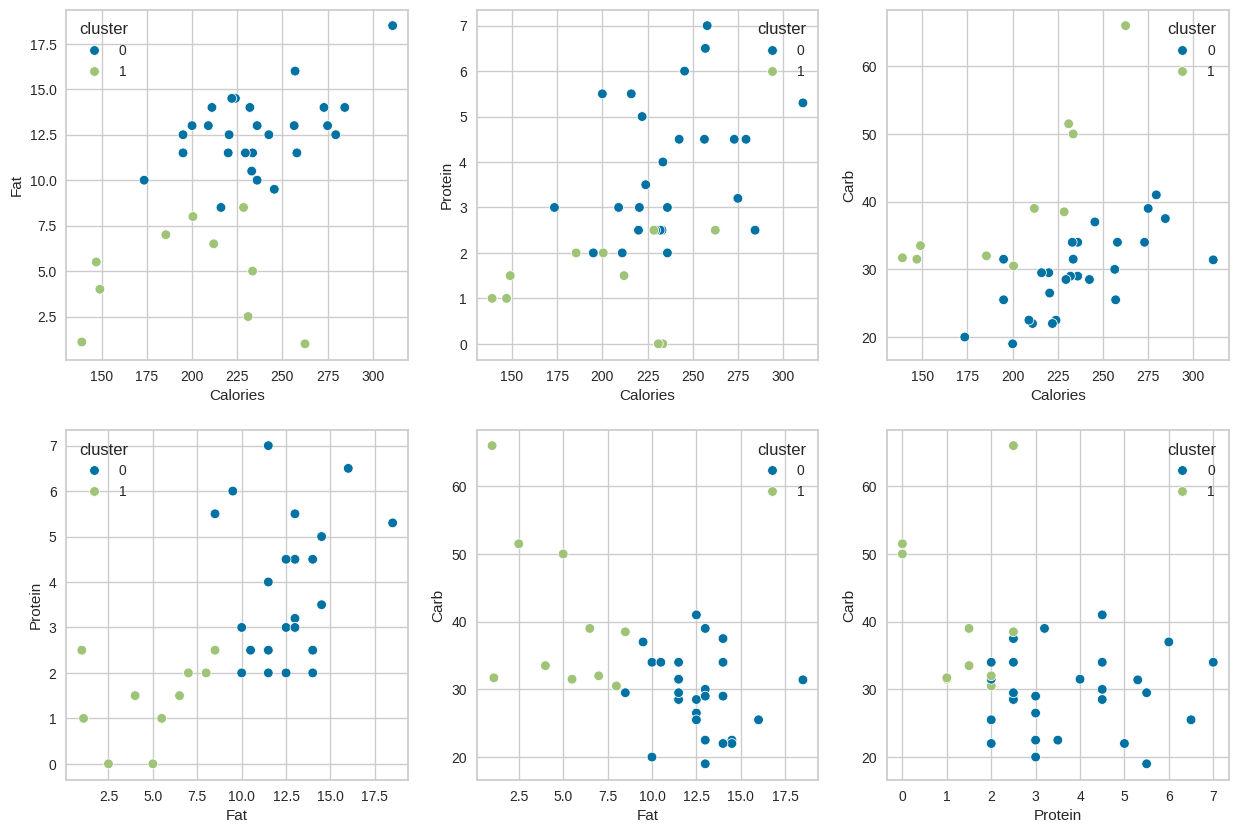

In [ ]:
# 산점도
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
# Calories        Fat   Protein       Carb
sns.scatterplot(data = df_X, x = 'Calories', y = 'Fat', hue = 'cluster', ax = ax1)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Protein', hue = 'cluster', ax = ax2)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Carb', hue = 'cluster', ax = ax3)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Protein', hue = 'cluster', ax = ax4)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Carb', hue = 'cluster', ax = ax5)
sns.scatterplot(data = df_X, x = 'Protein', y = 'Carb', hue = 'cluster', ax = ax6)
plt.show()

In [ ]:
# 모델 k = 3
from sklearn.cluster import KMeans
kmc3 = KMeans(n_clusters = 3, n_init = 'auto', random_state=42)
kmc3.fit(X_scale)
df_X = X
df_X['cluster'] = kmc3.labels_
clusters = df_X.groupby('cluster')
print(clusters.mean())
print(clusters.size())
# 군집1 비교적 낮은 칼로리, 지방, 단백질, 높은 탄수화물, 10개의 초코바
# 군집0 비교적 높은 칼로리, 지방, 단백질, 낮은 탄수화물, 18개의 초코바
# 군집2 비교적 높은 칼로리, 지방, 단백질, 탄수화물 9개의 초코바

           Calories        Fat   Protein       Carb
cluster                                            
0        218.250000  12.138889  3.222222  26.944444
1        198.850000   4.910000  1.400000  40.420000
2        271.111111  13.555556  4.888889  34.377778
cluster
0    18
1    10
2     9
dtype: int64


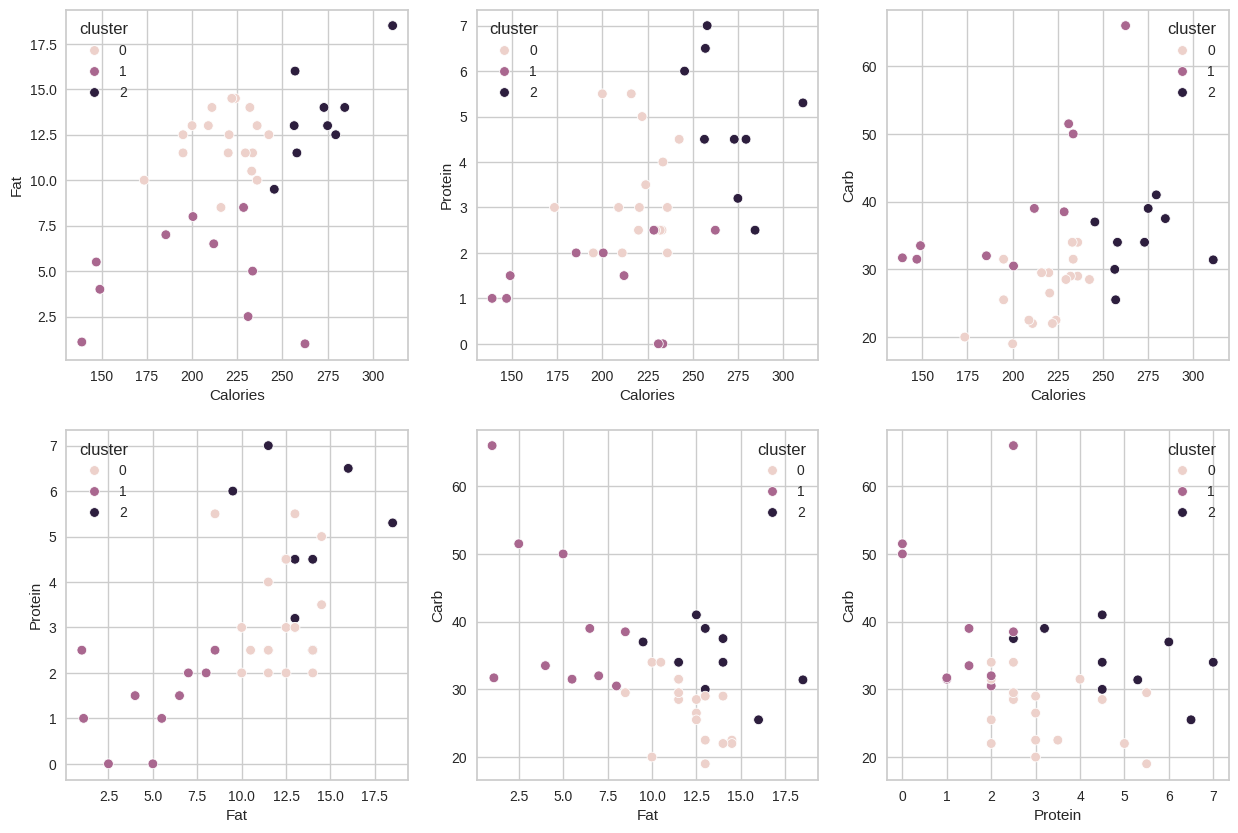

In [ ]:
# 산점도
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
# Calories        Fat   Protein       Carb
sns.scatterplot(data = df_X, x = 'Calories', y = 'Fat', hue = 'cluster', ax = ax1)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Protein', hue = 'cluster', ax = ax2)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Carb', hue = 'cluster', ax = ax3)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Protein', hue = 'cluster', ax = ax4)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Carb', hue = 'cluster', ax = ax5)
sns.scatterplot(data = df_X, x = 'Protein', y = 'Carb', hue = 'cluster', ax = ax6)
plt.show()

In [ ]:
# 모델 k = 4
from sklearn.cluster import KMeans
kmc4 = KMeans(n_clusters = 4, n_init = 'auto', random_state=42)
kmc4.fit(X_scale)
df_X = X
df_X['cluster'] = kmc4.labels_
clusters = df_X.groupby('cluster')
print(clusters.mean())
print(clusters.size())
# 군집3 비교적 낮은 칼로리, 지방, 단백질, 탄수화물 4개의 초코바
# 군집2 비교적 높은 칼로리, 지방, 낮은 단백질, 탄수화물 10개의 초코바
# 군집0 비교적 높은 칼로리, 지방, 단백질, 낮은 탄수화물 19개의 초코바
# 군집1 비교적 높은 칼로리, 탄수화물, 낮은 지방, 단백질 4개의 초코바

           Calories        Fat   Protein       Carb
cluster                                            
0        216.578947  11.710526  3.052632  27.657895
1        234.750000   3.750000  1.000000  51.625000
2        268.250000  13.450000  4.850000  33.790000
3        155.125000   4.400000  1.375000  32.175000
cluster
0    19
1     4
2    10
3     4
dtype: int64


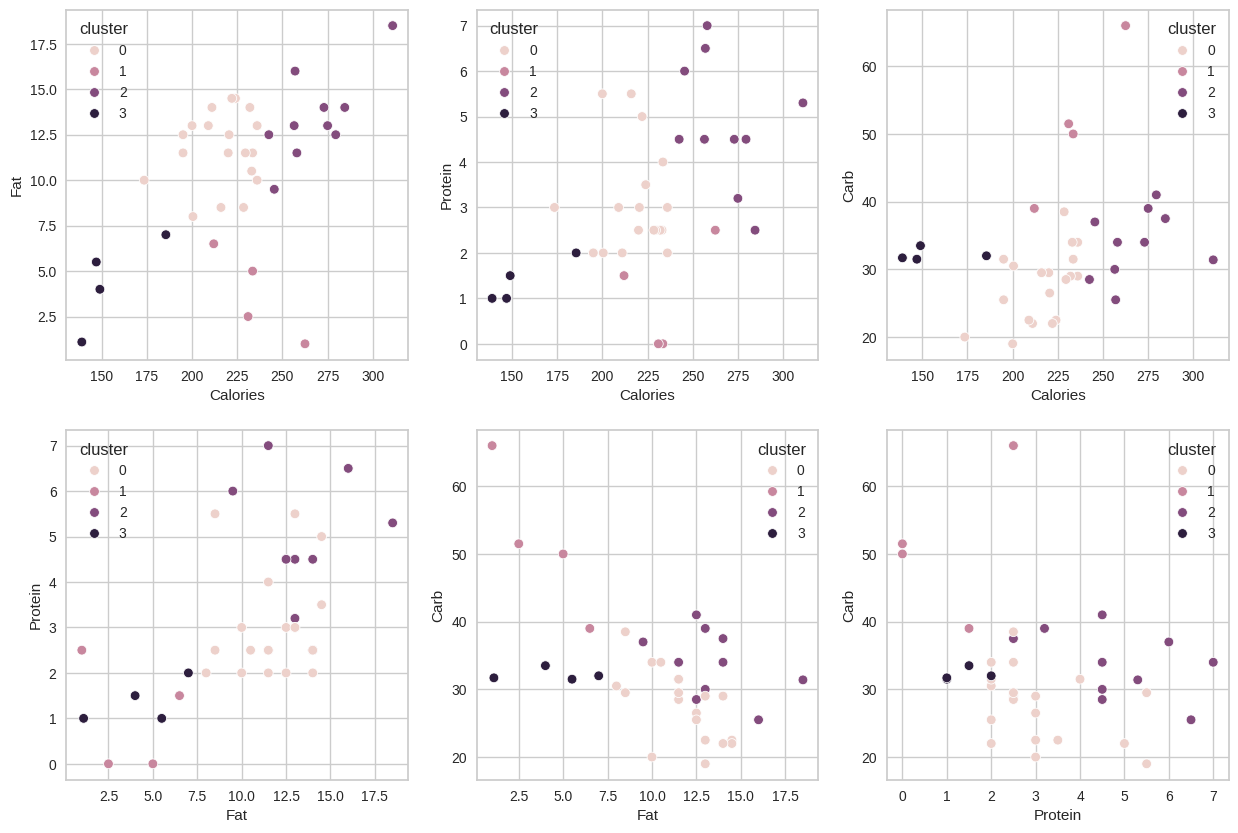

In [ ]:
# 산점도
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
# Calories        Fat   Protein       Carb
sns.scatterplot(data = df_X, x = 'Calories', y = 'Fat', hue = 'cluster', ax = ax1)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Protein', hue = 'cluster', ax = ax2)
sns.scatterplot(data = df_X, x = 'Calories', y = 'Carb', hue = 'cluster', ax = ax3)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Protein', hue = 'cluster', ax = ax4)
sns.scatterplot(data = df_X, x = 'Fat', y = 'Carb', hue = 'cluster', ax = ax5)
sns.scatterplot(data = df_X, x = 'Protein', y = 'Carb', hue = 'cluster', ax = ax6)
plt.show()

#### 실루엣도표

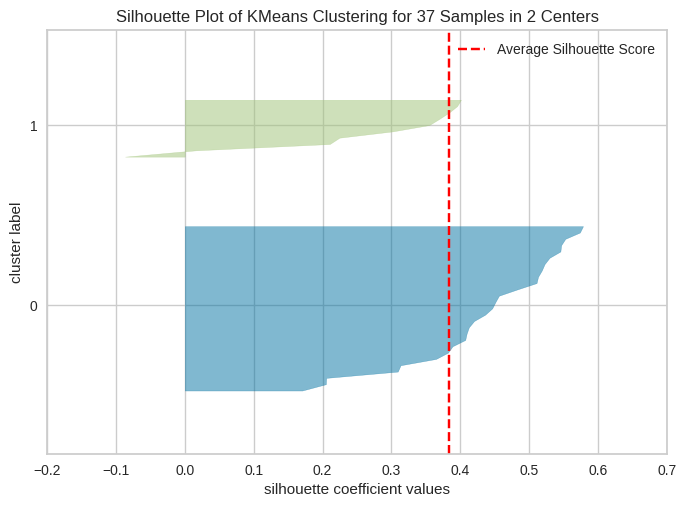

0.3842169400021826


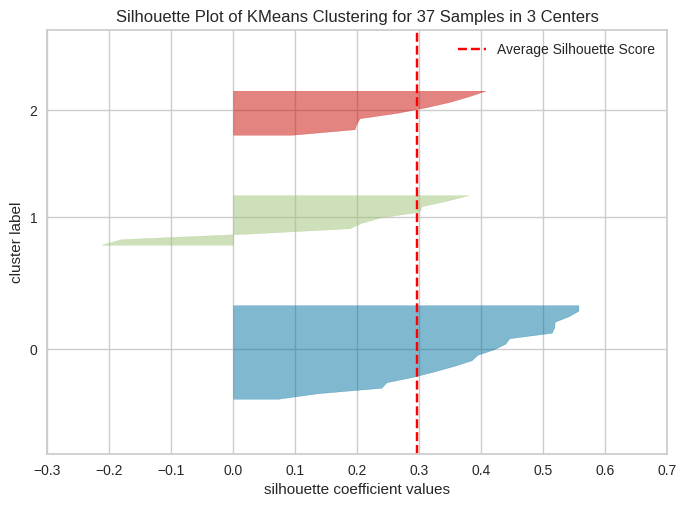

0.2960168394907411


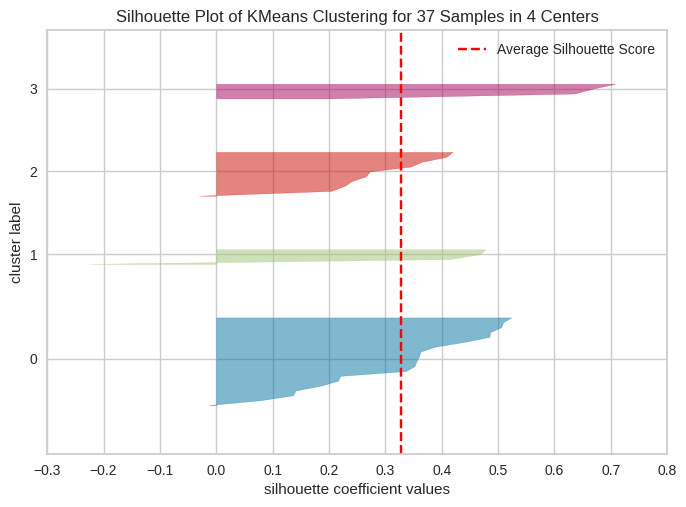

0.3277666710413639


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# K = 2
visualizer1 = SilhouetteVisualizer(kmc2, colors = 'yellowbrick')
visualizer1.fit(X_scale)
visualizer1.show()
print(visualizer1.silhouette_score_)
# # K = 3
visualizer2 = SilhouetteVisualizer(kmc3, colors = 'yellowbrick')
visualizer2.fit(X_scale)
visualizer2.show()
print(visualizer2.silhouette_score_)
# # K = 4
visualizer3 = SilhouetteVisualizer(kmc4, colors = 'yellowbrick')
visualizer3.fit(X_scale)
visualizer3.show()
print(visualizer3.silhouette_score_)
plt.show()

## KMC - 도매업 고객 데이터

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hwda02/data/customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# 연소비
# 1)	FRESH: annual spending (m.u.) on fresh products (Continuous);
# 신선제품
# 2)	MILK: annual spending (m.u.) on milk products (Continuous);
# 유제품
# 3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);
# 식료품
# 4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)
# 냉동제품
# 5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
# 세제 및 종이 제품
# 6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
# 델리카트슨 제품 = a store selling foods already prepared or requiring little preparation for serving, as cooked meats, cheese, salads, and the like

# 7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
# 판매 채널(호텔, 레스토랑, 소매점 등)
# 8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
# 고객 소재지

# CHANNEL	Frequency
# Horeca	298
# Retail	142
# Total	440

# REGION	Frequency
# Lisbon	77
# Oporto	47
# Other Region	316
# Total	440

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df['Channel'].value_counts()

,count
Channel,
1,298
2,142


In [ ]:
df['Region'].value_counts()

,count
Region,
3,316
1,77
2,47


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


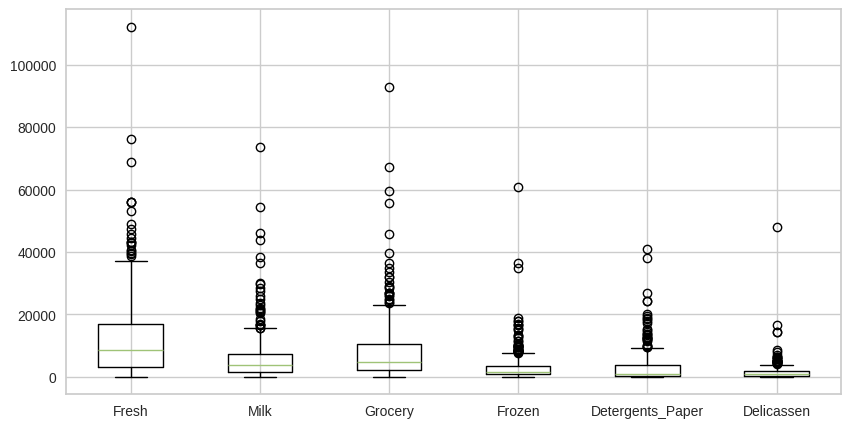

In [ ]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(x = [df['Fresh'], df['Milk'], df['Grocery'], df['Frozen'], df['Detergents_Paper'], df['Delicassen']],
           labels = df.drop(['Channel', 'Region'], axis = 1).columns)
plt.show()

In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
# 데이터 분할
# 전체 데이터
X = df

print("X 데이터: ", X.shape)

X 데이터:  (440, 8)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X)
X_scale = standard.transform(X)

In [ ]:
df_scale = pd.DataFrame(X_scale, columns = X.columns)

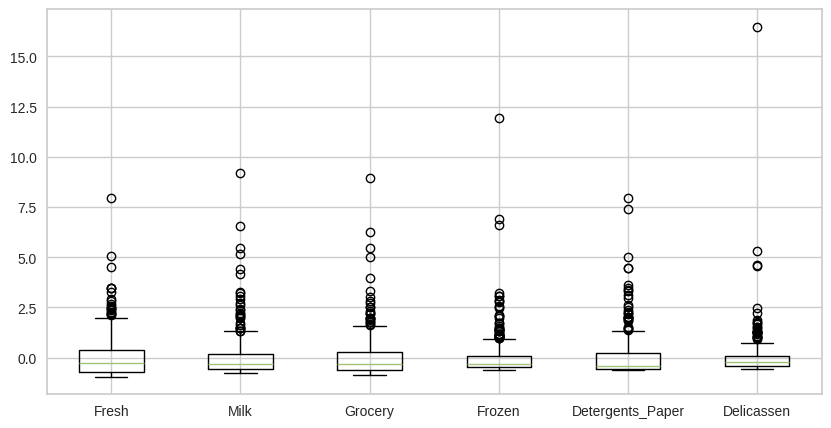

In [ ]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(x = [df_scale['Fresh'], df_scale['Milk'], df_scale['Grocery'], df_scale['Frozen'], df_scale['Detergents_Paper'], df_scale['Delicassen']],
           labels = df_scale.drop(['Channel', 'Region'], axis = 1).columns)
plt.show()

### 모델 적용

In [ ]:
# 모델
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 3, n_init = 'auto', random_state=42)
kmc.fit(X_scale)

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmc.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [ ]:
np.unique(kmc.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([130, 297,  13]))

In [ ]:
kmc.cluster_centers_

array([[ 1.4487,  0.1033, -0.3035,  0.4005,  0.6273, -0.3362,  0.653 ,
         0.0036],
       [-0.6831, -0.0493,  0.0851, -0.3496, -0.4315,  0.1131, -0.4419,
        -0.1003],
       [ 1.1196,  0.0934,  1.09  ,  3.9832,  3.5846,  0.778 ,  3.5666,
         2.2562]])

In [ ]:
pd.DataFrame(kmc.cluster_centers_, columns = X.columns)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.103305,-0.303522,0.400469,0.627264,-0.336203,0.652955,0.003599
1,-0.683095,-0.049304,0.085143,-0.349638,-0.431461,0.113106,-0.441921,-0.100331
2,1.119583,0.093359,1.090044,3.983203,3.584579,0.777993,3.566641,2.256182


In [ ]:
print(kmc.transform(X_scale[:5]))
print(kmc.labels_[:5])

[[1.175  2.554  6.8442]
 [0.8986 2.6085 6.6286]
 [2.4523 3.444  6.4168]
 [3.0737 0.9257 7.9223]
 [2.2299 2.7827 6.7704]]
[0 0 0 1 0]


In [ ]:
kmc.n_iter_

9

### 최적의 k 찾기

#### 엘보 방법

In [ ]:
# 최적의 k값
distortions = []
for k in range(1,11):
  kmc = KMeans(n_clusters = k, n_init = 'auto', random_state=42)
  kmc.fit(X_scale)
  distortions.append(kmc.inertia_)

In [ ]:
print(distortions)

[3520.0000000000014, 2600.3756482224435, 2149.2839562217573, 1851.8408722743864, 1567.449355005607, 1446.434958635648, 1189.4373315151008, 1146.3938222781724, 1082.6398816370165, 969.1934595642873]


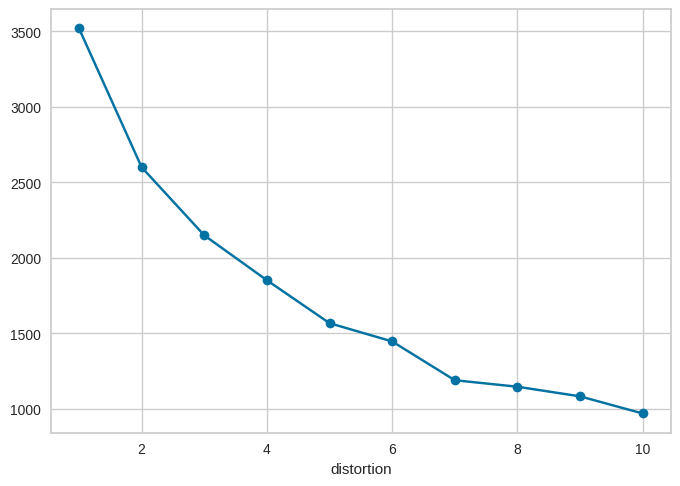

In [ ]:
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('n of clusters')
plt.xlabel('distortion')
plt.show()

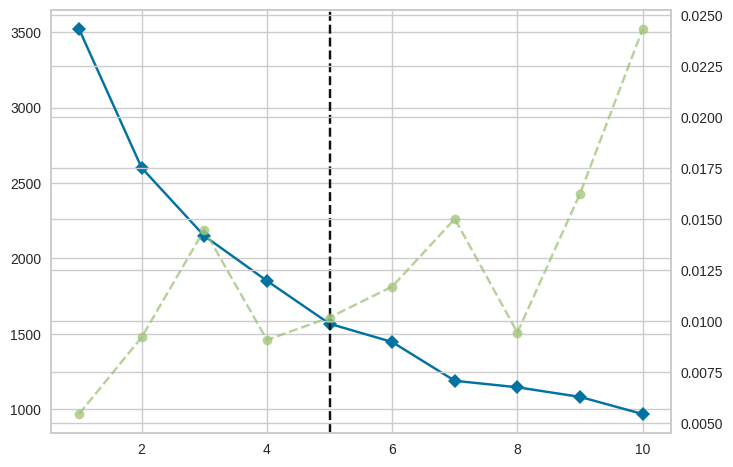

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
kmc = KMeans(n_init = 'auto', random_state=42)
vis = KElbowVisualizer(kmc, k = (1,11))
vis.fit(X_scale)
plt.show()

In [ ]:
# 실루엣 점수
from sklearn.metrics import silhouette_score
for k in range(2,5):
  kmc = KMeans(n_clusters = k, n_init = 'auto', random_state=42)
  kmc.fit(X_scale)
  y_pred = kmc.labels_
  print(k, ": ", silhouette_score(X_scale, y_pred, metric='euclidean'))

2 :  0.37415730136485814
3 :  0.3567685389017652
4 :  0.34819485747460033


### 최적 모델

In [ ]:
# 모델 k = 2
from sklearn.cluster import KMeans
kmc2 = KMeans(n_clusters = 2, n_init = 'auto', random_state=42)
kmc2.fit(X_scale)

KMeans(n_clusters=2, random_state=42)

In [ ]:
kmc2.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [ ]:
df_X = X
df_X['cluster'] = kmc2.labels_
df_X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [ ]:
clusters = df_X.groupby('cluster')

In [ ]:
print(clusters.mean())
print(clusters.size())
# 군집1 주로 horeca, 신선, 냉동 제품에 높은 연간 지출 300명
# 군집0 주로 소매점, 유제품, 식료품, 세제 및 종이 제품, 델리카트슨 제품에 높은 연간 지출 140명

          Channel    Region         Fresh          Milk       Grocery  \
cluster                                                                 
0        1.978571  2.642857   9575.607143  11447.614286  16774.728571   
1        1.016667  2.496667  13131.820000   3158.970000   3833.666667   

              Frozen  Detergents_Paper   Delicassen  
cluster                                              
0        1880.778571       7389.942857  2149.185714  
1        3627.803333        777.550000  1233.523333  
cluster
0    140
1    300
dtype: int64


In [ ]:
print(clusters.get_group(0).Channel.value_counts())
print(clusters.get_group(1).Channel.value_counts())

Channel
2    137
1      3
Name: count, dtype: int64
Channel
1    295
2      5
Name: count, dtype: int64


In [ ]:
print(clusters.get_group(0).Region.value_counts())
print(clusters.get_group(1).Region.value_counts())

Region
3    106
2     18
1     16
Name: count, dtype: int64
Region
3    210
1     61
2     29
Name: count, dtype: int64


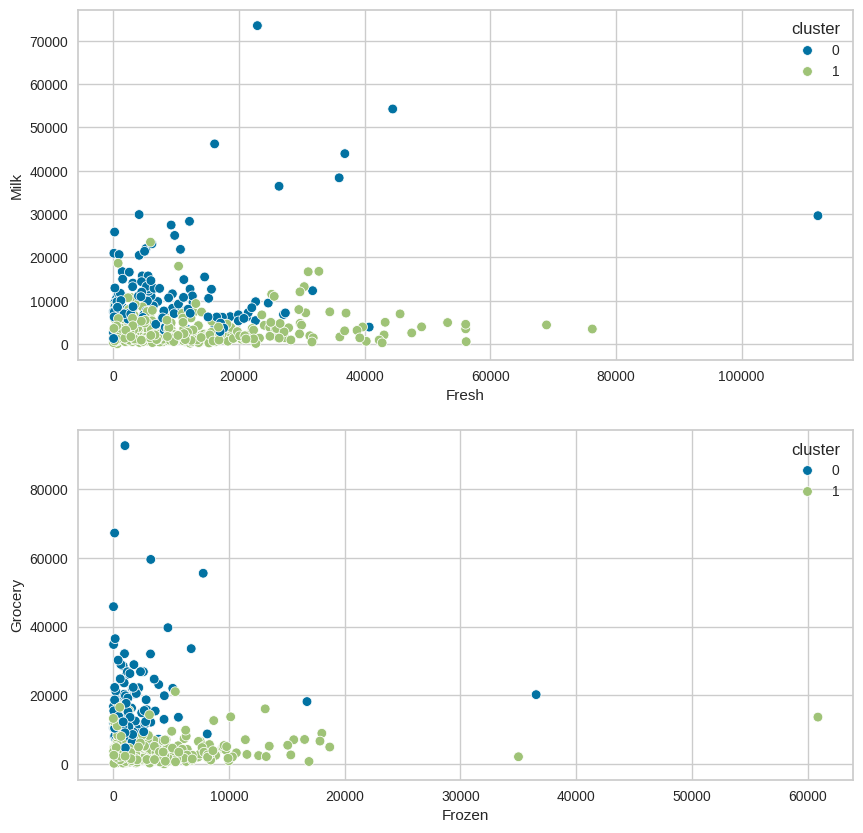

In [ ]:
# 그래프로 표현 - 시각화
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
sns.scatterplot(data = df_X, x = 'Fresh', y = 'Milk', hue = 'cluster', ax = ax1)
sns.scatterplot(data = df_X, x = 'Frozen', y = 'Grocery', hue = 'cluster', ax = ax2)
plt.show()
# 군집1 주로 horeca, 신선, 냉동 제품에 높은 연간 지출 300명
# 군집0 주로 소매점, 유제품, 식료품, 세제 및 종이 제품, 델리카트슨 제품에 높은 연간 지출 140명

In [ ]:
# 모델 k = 3
from sklearn.cluster import KMeans
kmc3 = KMeans(n_clusters = 3, n_init = 'auto', random_state=42)
kmc3.fit(X_scale)
df_X = X
df_X['cluster'] = kmc3.labels_
clusters = df_X.groupby('cluster')
print(clusters.mean())
print(clusters.size())
# 군집1 주로 소매점, 유제품, 식료품, 세제 및 종이 제품, 델리카트슨 제품에 중간 정도 연간 지출 130명
# 군집2 주로 호레카, 신선, 냉동 제품에 중간 정도 연간 지출 297명
# 군집3 주로 소매점, 전제품 모두 높은 연간 지출 13명

          Channel    Region         Fresh          Milk       Grocery  \
cluster                                                                 
0        2.000000  2.623077   8165.915385   8748.515385  13905.492308   
1        1.003367  2.505051  13075.898990   3218.737374   3855.696970   
2        1.846154  2.615385  25770.769231  35160.384615  41977.384615   

              Frozen  Detergents_Paper   Delicassen  
cluster                                              
0        1441.630769       5991.146154  1535.007692  
1        3620.400673        776.875421  1242.249158  
2        6844.538462      19867.384615  7880.307692  
cluster
0    130
1    297
2     13
dtype: int64


In [ ]:
print(clusters.get_group(0).Channel.value_counts())
print(clusters.get_group(1).Channel.value_counts())
print(clusters.get_group(2).Channel.value_counts())

Channel
2    130
Name: count, dtype: int64
Channel
1    296
2      1
Name: count, dtype: int64
Channel
2    11
1     2
Name: count, dtype: int64


In [ ]:
print(clusters.get_group(0).Region.value_counts())
print(clusters.get_group(1).Region.value_counts())
print(clusters.get_group(2).Region.value_counts())

Region
3    97
2    17
1    16
Name: count, dtype: int64
Region
3    209
1     59
2     29
Name: count, dtype: int64
Region
3    10
1     2
2     1
Name: count, dtype: int64


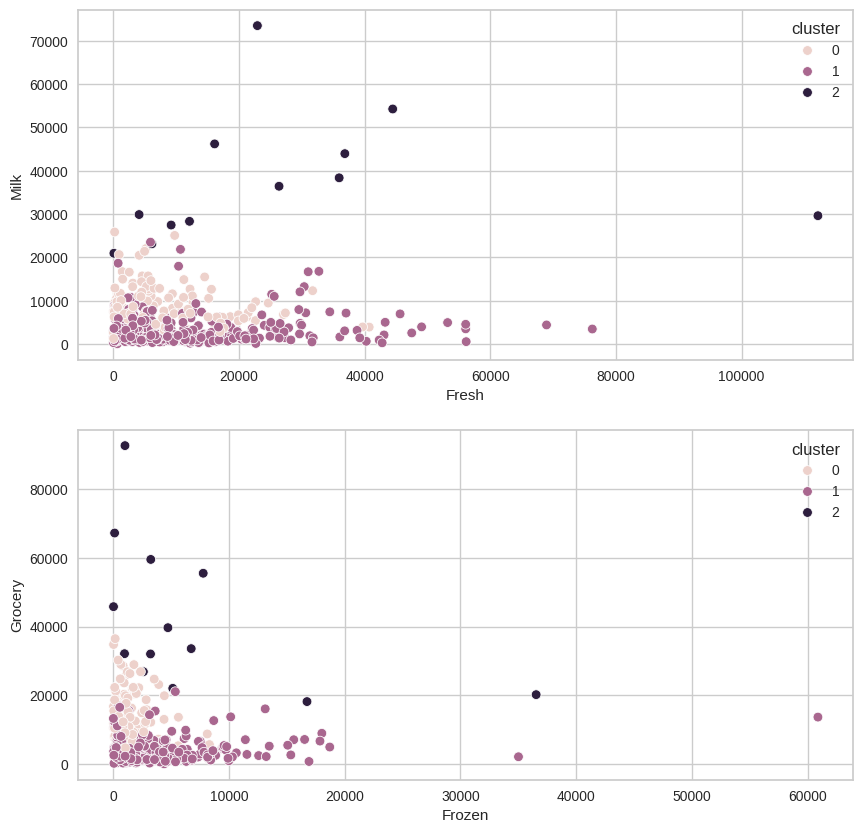

In [ ]:
# 그래프로 표현 - 시각화
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
sns.scatterplot(data = df_X, x = 'Fresh', y = 'Milk', hue = 'cluster', ax = ax1)
sns.scatterplot(data = df_X, x = 'Frozen', y = 'Grocery', hue = 'cluster', ax = ax2)
plt.show()
# 군집1 주로 소매점, 유제품, 식료품, 세제 및 종이 제품, 델리카트슨 제품에 중간 정도 연간 지출 130명
# 군집2 주로 호레카, 신선, 냉동 제품에 중간 정도 연간 지출 297명
# 군집3 주로 소매점, 전제품 모두 높은 연간 지출 13명

In [ ]:
# 모델 k = 4
from sklearn.cluster import KMeans
kmc4 = KMeans(n_clusters = 4, n_init = 'auto', random_state=42)
kmc4.fit(X_scale)
df_X = X
df_X['cluster'] = kmc4.labels_
clusters = df_X.groupby('cluster')
print(clusters.mean())
print(clusters.size())
# 군집0 주로 소매점, 유제품, 식료품, 세제 및 종이제품에 높은 연간 지출 126명
# 군집1 주로 호레카, 유제품, 식료품, 세제 및 종이 제품, 델리카트슨 제품에 낮은 연간 지출, 그나마 신선제품, 냉동제품이 소비가 높은 209명
# 군집2 주로 소매점, 신선, 유제품, 냉동제품, 세제 및 종이 제품, 델리카트슨 제품에 높은 연간 지출 13명
# 군집3 주로 호레카, 전반적으로 낮은 연간 지출, 그나마 신선제품, 유제품, 식료품, 냉동제품이 소비가 높음 92명

          Channel    Region         Fresh          Milk       Grocery  \
cluster                                                                 
0        2.000000  2.674603   8130.031746   8874.071429  14139.150794   
1        1.000000  3.000000  13297.947368   3168.306220   3740.588517   
2        1.846154  2.615385  25770.769231  35160.384615  41977.384615   
3        1.054348  1.315217  12407.130435   3401.771739   4234.130435   

              Frozen  Detergents_Paper   Delicassen  
cluster                                              
0        1339.476190       6104.936508  1542.706349  
1        3436.971292        769.392344  1262.511962  
2        6844.538462      19867.384615  7880.307692  
3        4082.282609        864.739130  1198.402174  
cluster
0    126
1    209
2     13
3     92
dtype: int64


In [ ]:
print(clusters.get_group(0).Channel.value_counts())
print(clusters.get_group(1).Channel.value_counts())
print(clusters.get_group(2).Channel.value_counts())
print(clusters.get_group(3).Channel.value_counts())

Channel
2    126
Name: count, dtype: int64
Channel
1    209
Name: count, dtype: int64
Channel
2    11
1     2
Name: count, dtype: int64
Channel
1    87
2     5
Name: count, dtype: int64


In [ ]:
print(clusters.get_group(0).Region.value_counts())
print(clusters.get_group(1).Region.value_counts())
print(clusters.get_group(2).Region.value_counts())
print(clusters.get_group(3).Region.value_counts())

Region
3    97
2    17
1    12
Name: count, dtype: int64
Region
3    209
Name: count, dtype: int64
Region
3    10
1     2
2     1
Name: count, dtype: int64
Region
1    63
2    29
Name: count, dtype: int64


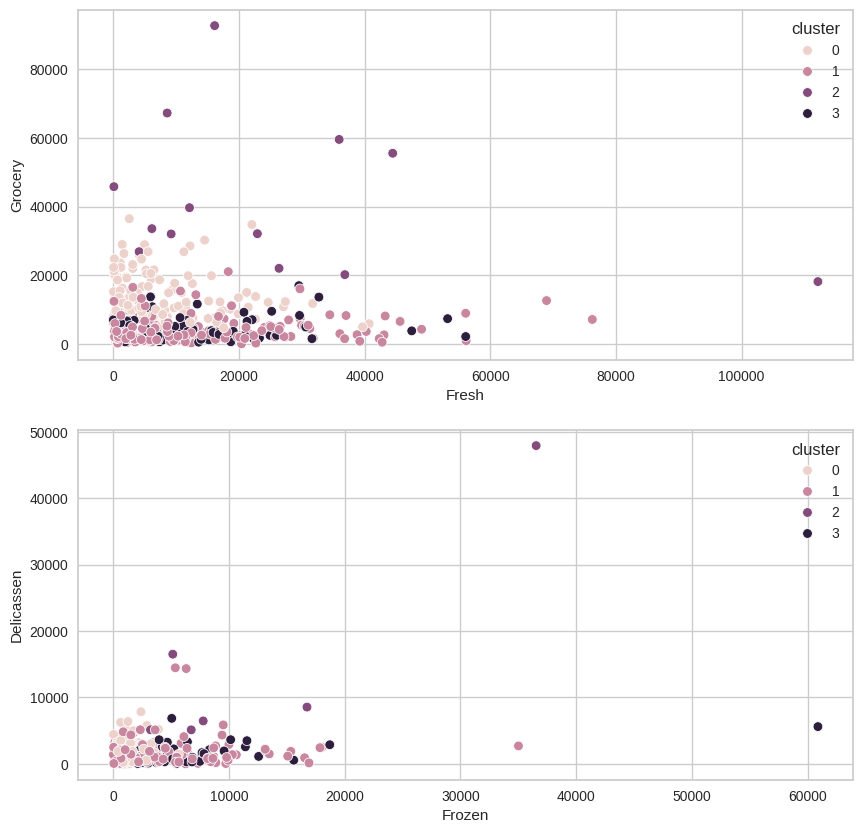

In [ ]:
# 그래프로 표현 - 시각화
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
sns.scatterplot(data = df_X, x = 'Fresh', y = 'Grocery', hue = 'cluster', ax = ax1)
sns.scatterplot(data = df_X, x = 'Frozen', y = 'Delicassen', hue = 'cluster', ax = ax2)
plt.show()
# 군집0 주로 소매점, 유제품, 식료품, 세제 및 종이제품에 높은 연간 지출 126명
# 군집1 주로 호레카, 유제품, 식료품, 세제 및 종이 제품, 델리카트슨 제품에 낮은 연간 지출, 그나마 신선제품, 냉동제품이 소비가 높은 209명
# 군집2 주로 소매점, 신선, 유제품, 냉동제품, 세제 및 종이 제품, 델리카트슨 제품에 높은 연간 지출 13명
# 군집3 주로 호레카, 전반적으로 낮은 연간 지출, 그나마 신선제품, 유제품, 식료품, 냉동제품이 소비가 높음 92명

#### 실루엣도표

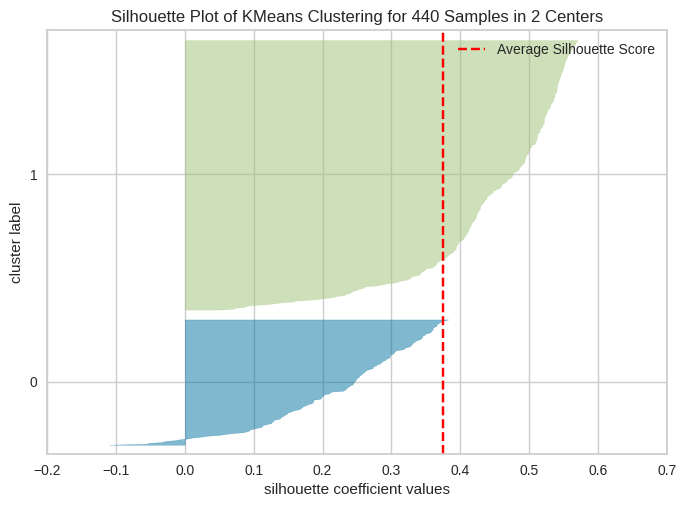

0.37415730136485814


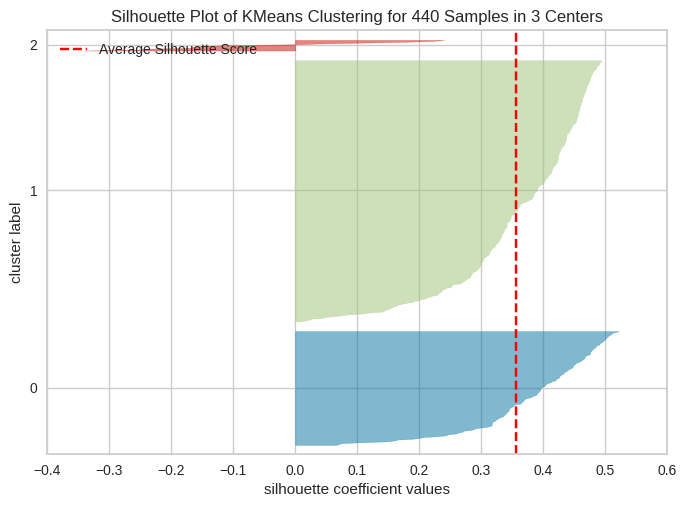

0.3567685389017652


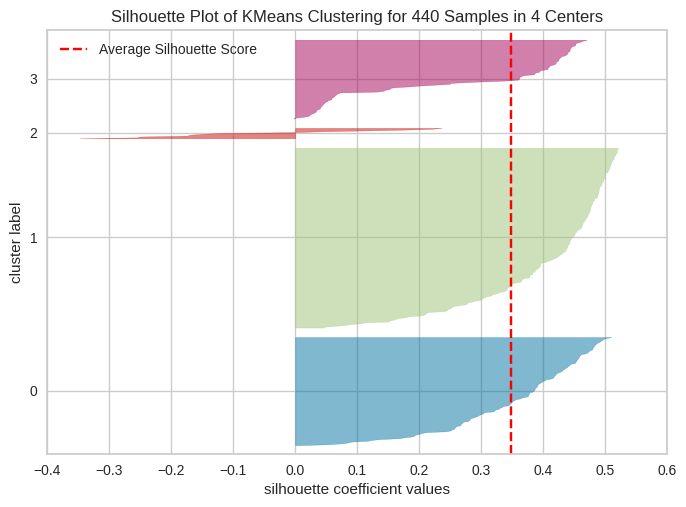

0.34819485747460033


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# K = 2
visualizer1 = SilhouetteVisualizer(kmc2, colors = 'yellowbrick')
visualizer1.fit(X_scale)
visualizer1.show()
print(visualizer1.silhouette_score_)
# # K = 3
visualizer2 = SilhouetteVisualizer(kmc3, colors = 'yellowbrick')
visualizer2.fit(X_scale)
visualizer2.show()
print(visualizer2.silhouette_score_)
# # K = 4
visualizer3 = SilhouetteVisualizer(kmc4, colors = 'yellowbrick')
visualizer3.fit(X_scale)
visualizer3.show()
print(visualizer3.silhouette_score_)
plt.show()